## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 123)

%matplotlib inline

C:\Users\vatsal jain\AppData\Local\Temp\ipykernel_14076\2583053730.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Import Datasets

In [2]:
df_app = pd.read_csv('application_data.csv')
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
df_app.shape

(307511, 122)

### Deleting columns with nan values greater than 25%

In [4]:
(df_app['OWN_CAR_AGE'].isnull().sum()/ df_app.shape[0]) * 100

# around 66% of the data is null!

65.9908100848425

In [5]:
# finding all the columns with missing data more than 25%

not_imp_col = []

for c in df_app.columns:
    if ((df_app[c].isnull().sum())/(df_app.shape[0])) > 0.25:
        not_imp_col.append(c)
        print(c)

OWN_CAR_AGE
OCCUPATION_TYPE
EXT_SOURCE_1
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [6]:
len(not_imp_col)

# There are total 50 rows with missing data more than 25%

50

In [7]:
# But OWN_CAR_AGE and OCCUPATION_TYPE columns seem important, so we are not dropping them
not_imp_col = not_imp_col[2:]

In [8]:
# removing unwanted columns

df_app.drop(labels=not_imp_col, axis=1, inplace=True)
df_app.shape

# shape reduced from 122 to 74

(307511, 74)

In [9]:
# removing more unwanted columns

not_imp_col = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_app.drop(not_imp_col, axis=1, inplace=True)

In [10]:
# removing more unwanted columns

not_imp_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_13']
df_app.drop(not_imp_col, axis=1, inplace=True)

In [11]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -2120          NaN        Laborers              1.0   
1             -291          NaN      Core staff              2.0   
2            -2531         26.0        Laborers              1.0   
3            -2437          NaN        Laborers              2.0   
4            -3458          NaN      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY  Business Entity Type 3   
1                     MONDAY                  School   
2                     MONDAY              Government   
3                  WEDNESDAY  Business Entity Type 3   
4                   THURSDAY                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                  

In [12]:
df_app[ df_app['DAYS_BIRTH'] > 0]

# All values are negative for columns: DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [13]:
# converting negative values to positive values

for c in ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']:
    df_app[c] = df_app[c].apply(lambda x: abs(x))

In [14]:
# checking columns and their null percentages

((df_app.isnull().sum()/ df_app.shape[0]) * 100).sort_values(ascending=False).head(20)

OWN_CAR_AGE                    65.990810
OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
ORGANIZATION_TYPE               0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
dtype: float64

In [15]:
# OWN_CAR_AGE column has 65% null values, so removing that too

df_app.drop('OWN_CAR_AGE', axis=1, inplace=True)
df_app.shape

(307511, 38)

## Wroking on columns which are still having missing values (but missing percentage < 25)

In [16]:
((df_app.isnull().sum()/ df_app.shape[0]) * 100).sort_values(ascending=False)

# We can see there are 8 more columns with missing values
# we have to work on these columns

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
ORGANIZATION_TYPE               0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
SK_ID_CURR                      0.000000
DAYS_ID_PUBLISH                 0.000000
AMT_CREDIT                      0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER     

In [17]:
df_app['OCCUPATION_TYPE'].value_counts(normalize=True).head()*100

# mode of the data is : Laborers

OCCUPATION_TYPE
Laborers       26.139636
Sales staff    15.205570
Core staff     13.058924
Managers       10.122679
Drivers         8.811576
Name: proportion, dtype: float64

In [18]:
# we are filling those 31.345545% missing values in OCCUPATION_TYPE with mode of the data
df_app['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)
df_app['OCCUPATION_TYPE'].isnull().sum()

0

In [19]:
(df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100).head()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0    26.993669
1.0    23.837183
2.0    18.869740
3.0    12.642485
4.0     7.787452
Name: proportion, dtype: float64

In [20]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_YEAR with mode of the column
df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [21]:
(df_app['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100).head()

AMT_REQ_CREDIT_BUREAU_QRT
0.0    80.986270
1.0    12.730458
2.0     5.418208
3.0     0.645508
4.0     0.178953
Name: proportion, dtype: float64

In [22]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_QRT with mode of the column
df_app['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [23]:
(df_app['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100).head()

AMT_REQ_CREDIT_BUREAU_MON
0.0    83.548753
1.0    12.461653
2.0     2.024873
3.0     0.748519
4.0     0.404523
Name: proportion, dtype: float64

In [24]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_MON with mode of the column
df_app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [25]:
(df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100).head()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
Name: proportion, dtype: float64

In [26]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_WEEK with mode of the column
df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [27]:
(df_app['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100).head()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
Name: proportion, dtype: float64

In [28]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_DAY with mode of the column

df_app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [29]:
(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100).head()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [30]:
# we are filling nan values of AMT_REQ_CREDIT_BUREAU_HOUR with mode of the column

df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [31]:
df_app['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [32]:
df_app['AMT_GOODS_PRICE'].median()

450000.0

<Axes: ylabel='AMT_GOODS_PRICE'>

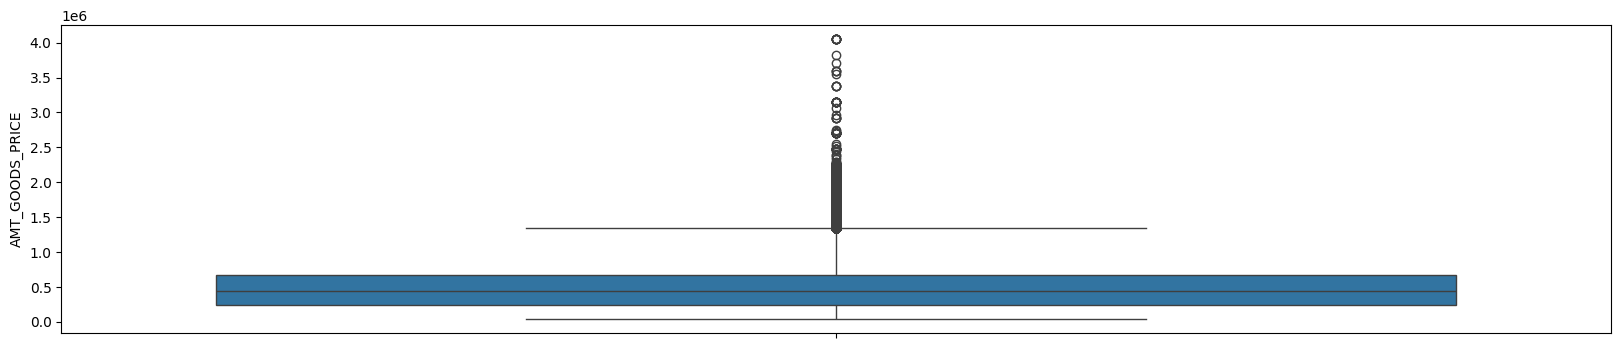

In [33]:
# checking for outliers in AMT_GOODS_PRICE
plt.figure(figsize=[20,4])
sns.boxplot(df_app['AMT_GOODS_PRICE'])

In [34]:
# we are filling nan values of AMT_GOODS_PRICE with median of the column

df_app['AMT_GOODS_PRICE'].fillna(450000, inplace=True)
df_app['AMT_GOODS_PRICE'].isnull().sum()

0

In [35]:
df_app['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<Axes: ylabel='AMT_ANNUITY'>

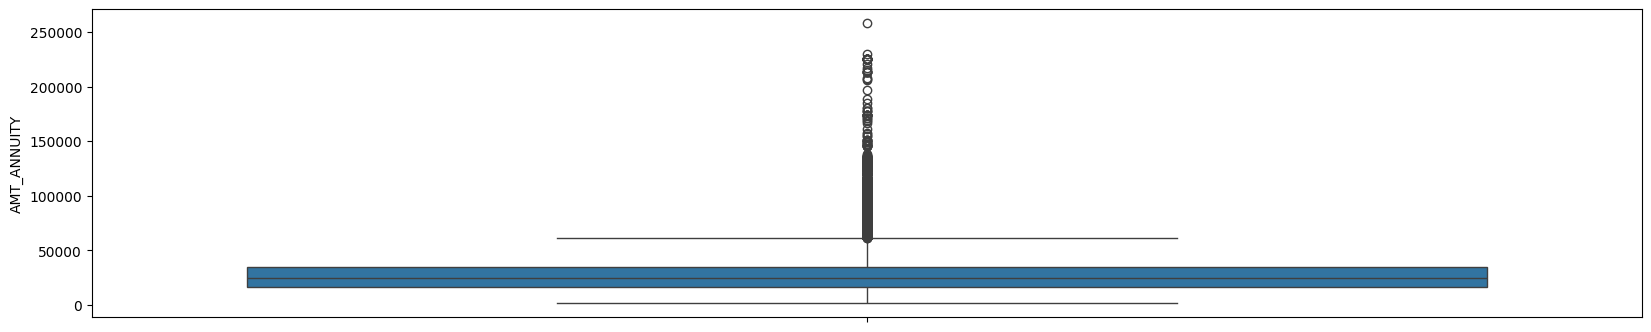

In [36]:
# checking for outliers in AMT_GOODS_PRICE

plt.figure(figsize=[20,4])
sns.boxplot(df_app['AMT_ANNUITY'])

In [37]:
# we are filling nan values of AMT_ANNUITY with median of the column

df_app['AMT_ANNUITY'].fillna(24903, inplace=True)
df_app['AMT_ANNUITY'].isnull().sum()

0

In [38]:
df_app['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize=True)*100

DAYS_LAST_PHONE_CHANGE
0.0       12.250659
1.0        0.914442
2.0        0.753797
3.0        0.573315
4.0        0.417873
            ...    
4051.0     0.000325
3593.0     0.000325
3622.0     0.000325
3570.0     0.000325
3538.0     0.000325
Name: proportion, Length: 3773, dtype: float64

In [39]:
df_app['DAYS_LAST_PHONE_CHANGE'].median()

757.0

<Axes: ylabel='DAYS_LAST_PHONE_CHANGE'>

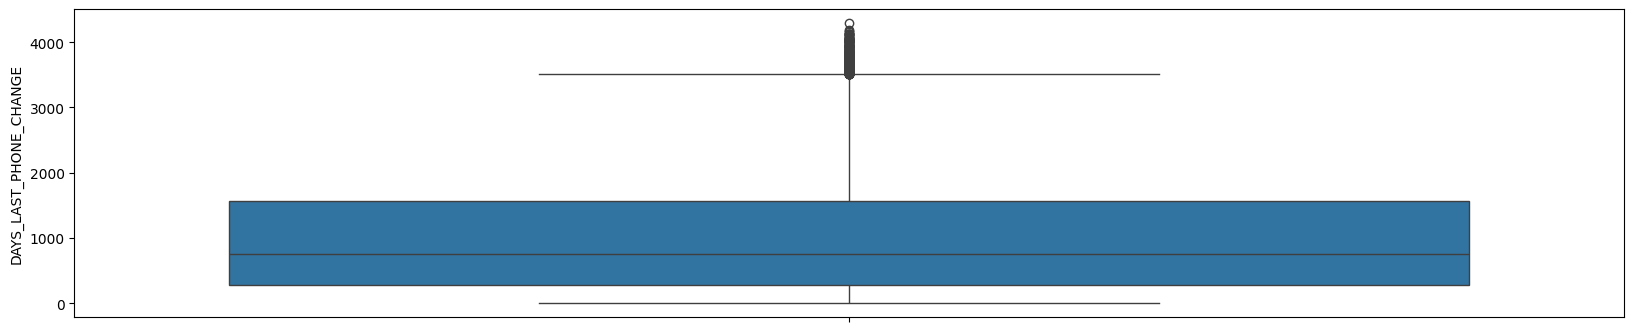

In [40]:
# checking for outliers in DAYS_LAST_PHONE_CHANGE

plt.figure(figsize=[20,4])
sns.boxplot(df_app['DAYS_LAST_PHONE_CHANGE'])

In [41]:
# we are filling nan values of DAYS_LAST_PHONE_CHANGE with median of the column

df_app['DAYS_LAST_PHONE_CHANGE'].fillna(757, inplace=True)
df_app['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

## Working on categorical variables

In [42]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   
1                  School                       1.0                       0.0   
2              Government                       0.0                       0.0   
3  Business Entity Type 3                       2.0                       0.0   
4                Religion                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   
1                       1.0                       0.0                   828.0   
2                       0.0                       0.0                   815.0   
3                       2.0                       0.0                   617.0   
4                       0.0                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_

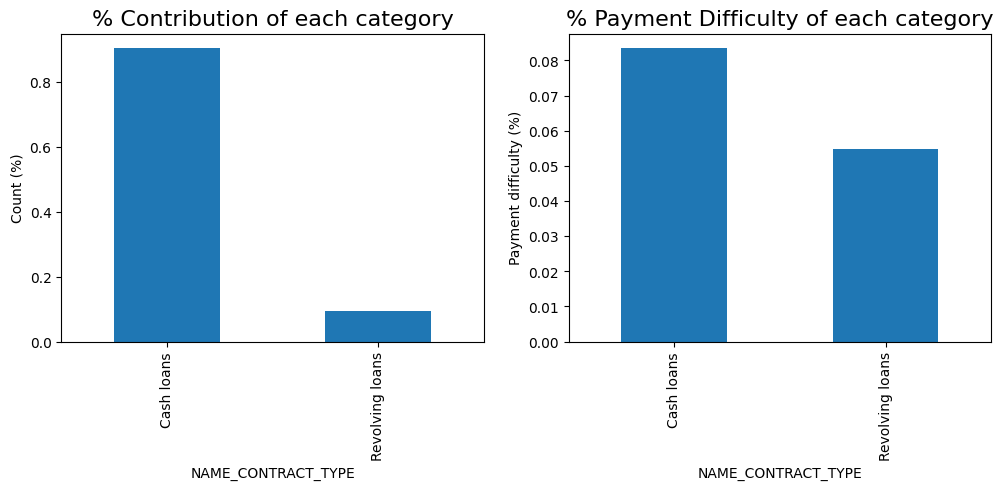

In [43]:
# for NAME_CONTRACT_TYPE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_CONTRACT_TYPE')['TARGET'].mean().plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants with contract product type as 'Cash' are more likely to have loan payment difficulty

In [44]:
df_app['CODE_GENDER'].value_counts()

# these XNA values must be replaced with mode

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [45]:
# replacing XNA with F

df_app['CODE_GENDER']  = df_app['CODE_GENDER'].apply(lambda x: 'F' if x=='XNA' else x)

# also we can use iloc approach as that one is faster: df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'

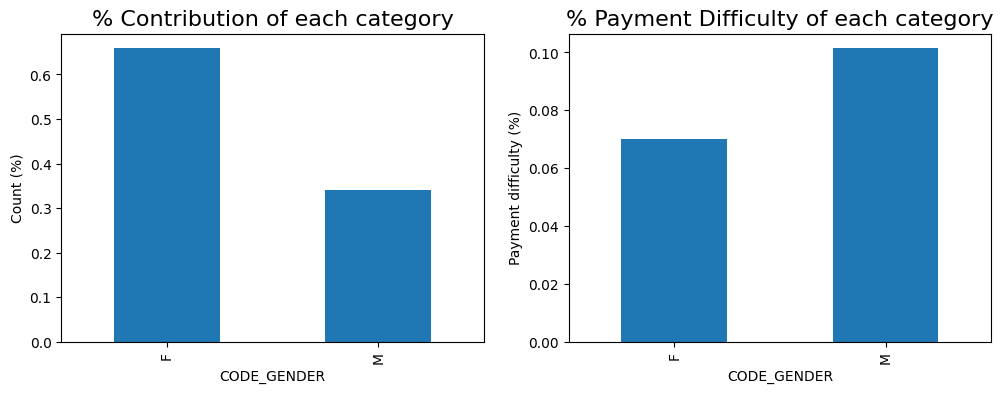

In [46]:
# for CODE_GENDER column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("CODE_GENDER")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='CODE_GENDER')['TARGET'].mean().plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("CODE_GENDER")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Males more likely to have loan payment difficulty

In [47]:
df_app['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

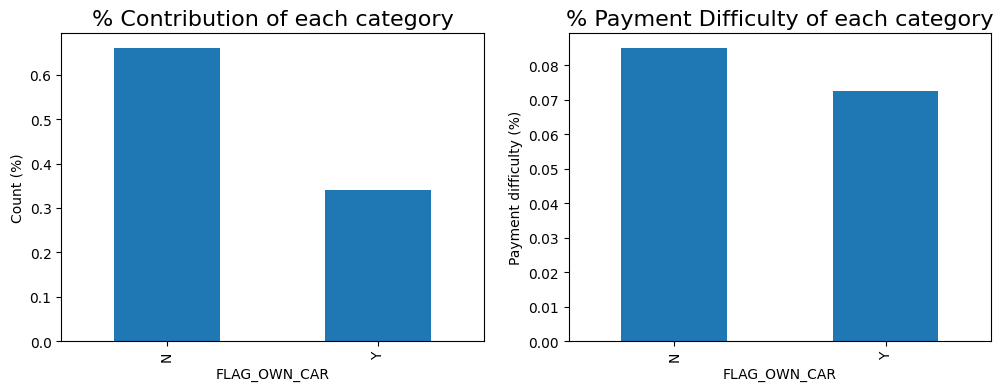

In [48]:
# for FLAG_OWN_CAR column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['FLAG_OWN_CAR'].value_counts(normalize=True).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='FLAG_OWN_CAR')['TARGET'].mean().plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [49]:
df_app['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

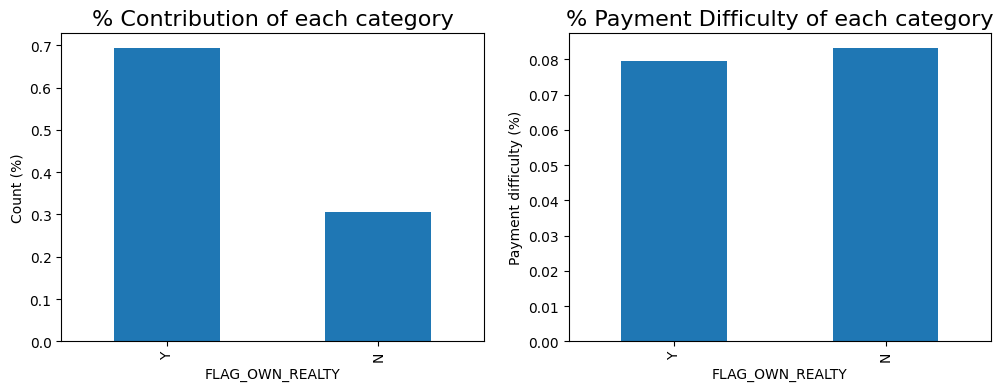

In [50]:
# for FLAG_OWN_REALTY column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['FLAG_OWN_REALTY'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("FLAG_OWN_REALTY")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='FLAG_OWN_REALTY')['TARGET'].mean().sort_values(ascending=True).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("FLAG_OWN_REALTY")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [51]:
df_app['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

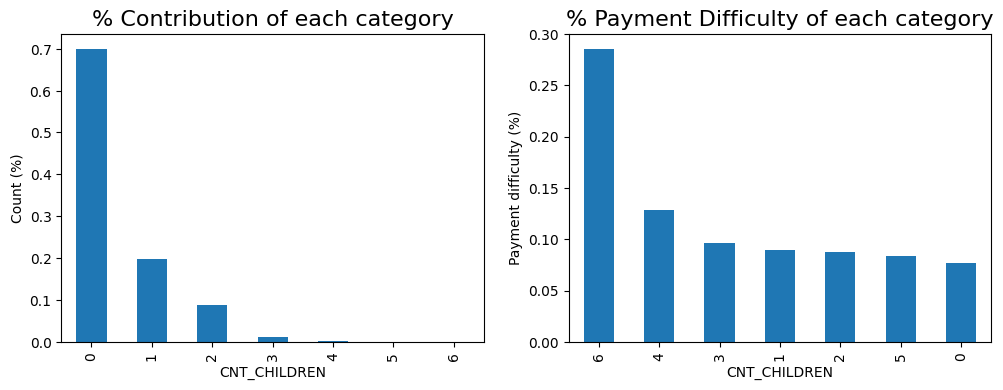

In [52]:
# only few people have children more than 6, so removing data points where children > 6
df_app = df_app[df_app['CNT_CHILDREN'] <=6]


# plotting for CNT_CHILDREN column
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['CNT_CHILDREN'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("CNT_CHILDREN")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='CNT_CHILDREN')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("CNT_CHILDREN")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants with children >= 6 have double or triple loan payment difficulty than applicants with children <= 5

In [53]:
df_app['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248512
Family              40144
Spouse, partner     11369
Children             3266
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [54]:
df_app['NAME_TYPE_SUITE'].isnull().any()

True

In [55]:
# replacing nan values with mode of the column
df_app['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

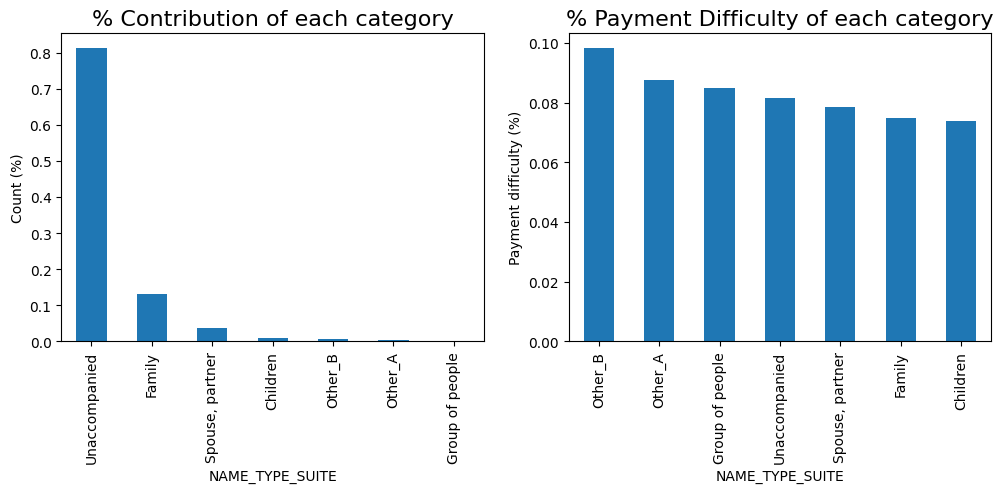

In [56]:
# for NAME_TYPE_SUITE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_TYPE_SUITE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_TYPE_SUITE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [57]:
df_app['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158762
Commercial associate     71610
Pensioner                55361
State servant            21702
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

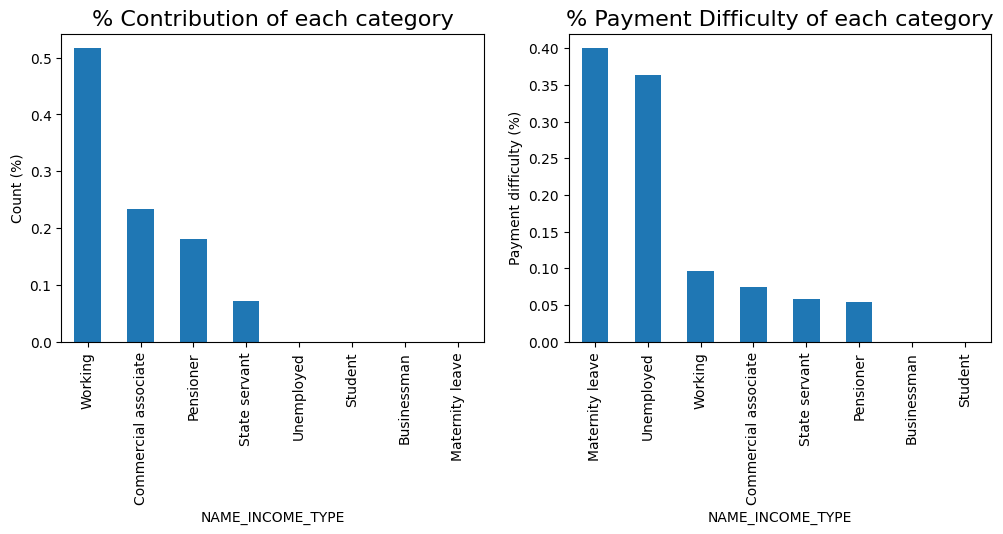

In [58]:
# for NAME_INCOME_TYPE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_INCOME_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants which are on maternity leave or are unemployed have almost 4 times loan payment difficulty than other income source applicants
# Observation: businessman people do not have difficulty in loan paymewent

In [59]:
df_app['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218374
Higher education                  74859
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

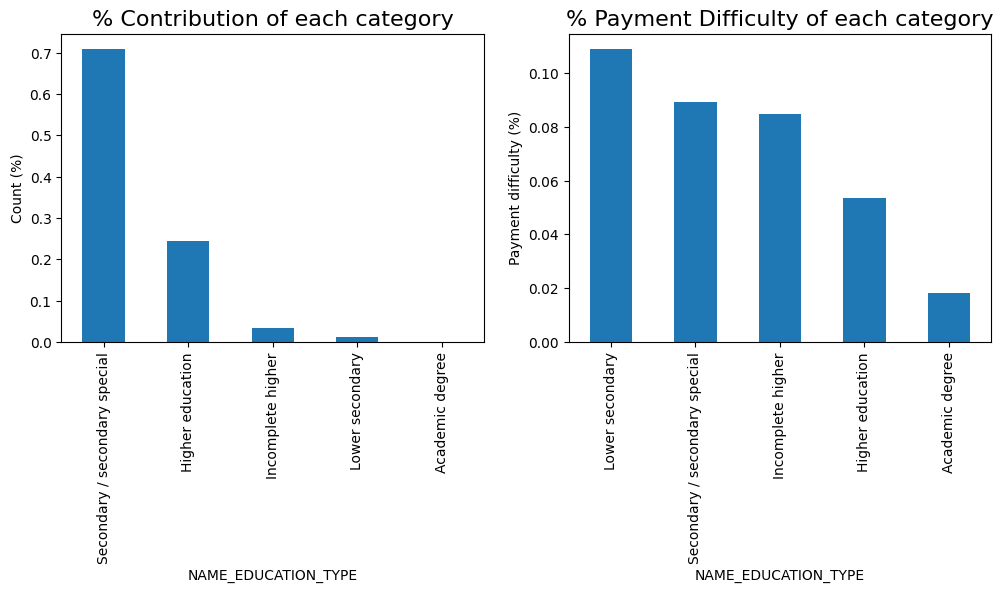

In [60]:
# for NAME_EDUCATION_TYPE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_EDUCATION_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants with lower secondary education level have loan payment difficulty
# Observation: Applicants with Higher education level or having Academic degree have very less loan payment difficulty

In [61]:
df_app['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196418
Single / not married     45441
Civil marriage           29773
Separated                19769
Widow                    16087
Unknown                      2
Name: count, dtype: int64

In [62]:
# removing 'unknown' values as they are only 2 in number
df_app = df_app[~(df_app['NAME_FAMILY_STATUS'] == 'Unknown')]

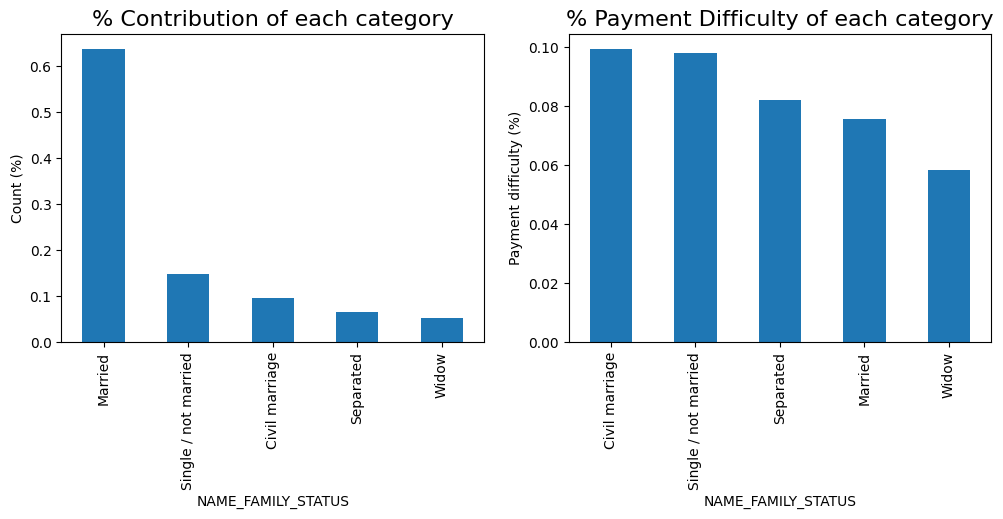

In [63]:
# for NAME_FAMILY_STATUS columns

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_FAMILY_STATUS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: widows are less likely to face loan payment difficulty (interesting)

In [64]:
df_app['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272848
With parents            14840
Municipal apartment     11180
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

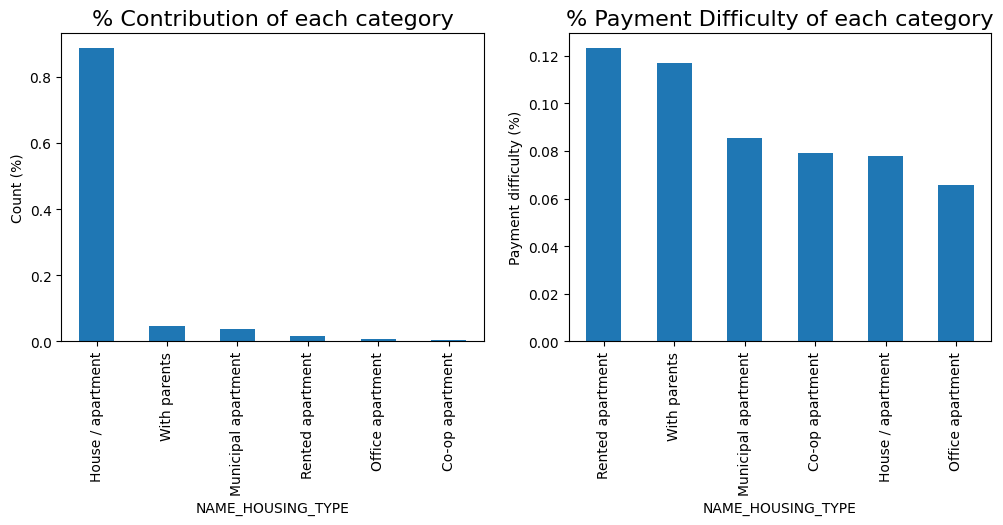

In [65]:
# for NAME_HOUSING_TYPE column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['NAME_HOUSING_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants which are living in rented apartments or living with parents have more loan payment difficulty

In [66]:
df_app['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53896
WEDNESDAY    51932
MONDAY       50714
THURSDAY     50586
FRIDAY       50330
SATURDAY     33851
SUNDAY       16179
Name: count, dtype: int64

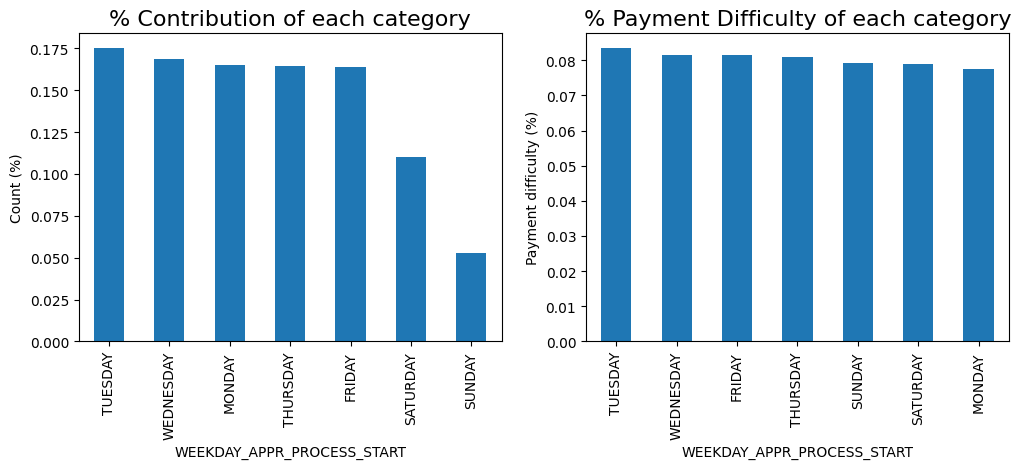

In [67]:
# for WEEKDAY_APPR_PROCESS_START column

plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("WEEKDAY_APPR_PROCESS_START")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='WEEKDAY_APPR_PROCESS_START')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("WEEKDAY_APPR_PROCESS_START")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [68]:
df_app['ORGANIZATION_TYPE'].value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67989
XNA                       55373
Self-employed             38409
Other                     16682
Medicine                  11193
Name: count, dtype: int64

In [69]:
# replacing nan values with mode of the column
df_app['ORGANIZATION_TYPE'] = df_app['ORGANIZATION_TYPE'].replace('XNA', 'Business Entity Type 3')

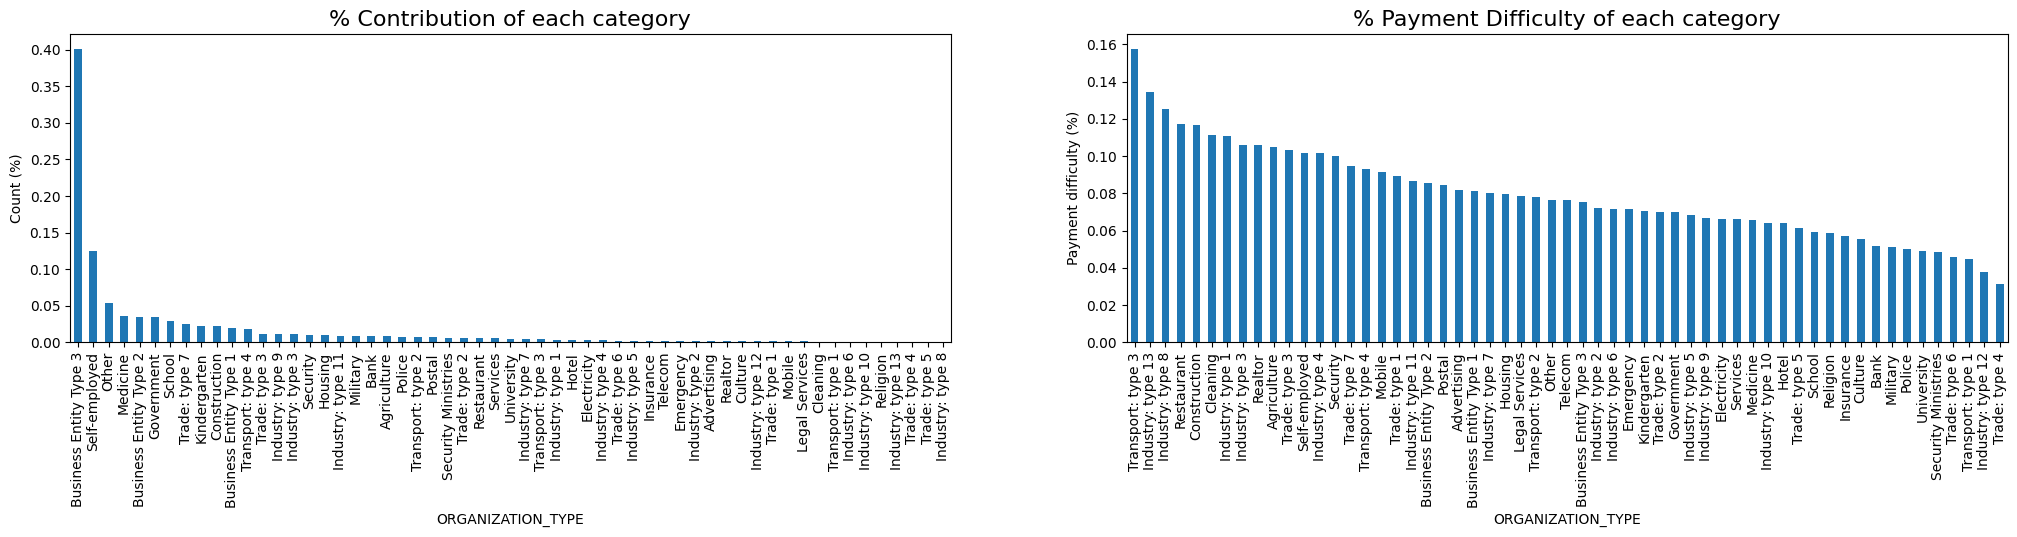

In [70]:
# for ORGANIZATION_TYPE column

plt.figure(figsize=[25,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['ORGANIZATION_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("ORGANIZATION_TYPE")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='ORGANIZATION_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("ORGANIZATION_TYPE")
plt.ylabel("Payment difficulty (%)")

plt.show()

## Working on continuous variables

In [71]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   
1                  School                       1.0                       0.0   
2              Government                       0.0                       0.0   
3  Business Entity Type 3                       2.0                       0.0   
4                Religion                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   
1                       1.0                       0.0                   828.0   
2                       0.0                       0.0                   815.0   
3                       2.0                       0.0                   617.0   
4                       0.0                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_

In [72]:
df_app['AMT_INCOME_TOTAL'].describe()

count    3.074880e+05
mean     1.687981e+05
std      2.371305e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: ylabel='AMT_INCOME_TOTAL'>

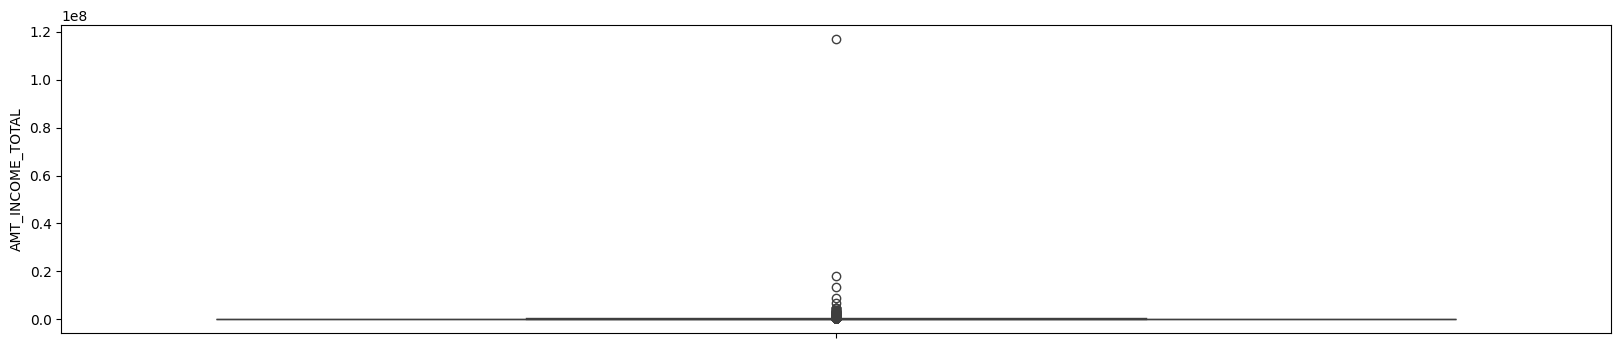

In [73]:
# checking for outliers

plt.figure(figsize=[20,4])
sns.boxplot(df_app['AMT_INCOME_TOTAL'])

In [74]:
# further outlier analysis
df_app['AMT_INCOME_TOTAL'].quantile([0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 0.9999, 0.99999])

0.50000    1.471500e+05
0.70000    1.800000e+05
0.90000    2.700000e+05
0.95000    3.375000e+05
0.99000    4.725000e+05
0.99900    9.000000e+05
0.99990    2.250000e+06
0.99999    8.831542e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [75]:
# keeping rows where AMT_INCOME_TOTAL value < 24 lacks

df_app = df_app[df_app['AMT_INCOME_TOTAL'] < 2400000]

<Axes: ylabel='AMT_INCOME_TOTAL'>

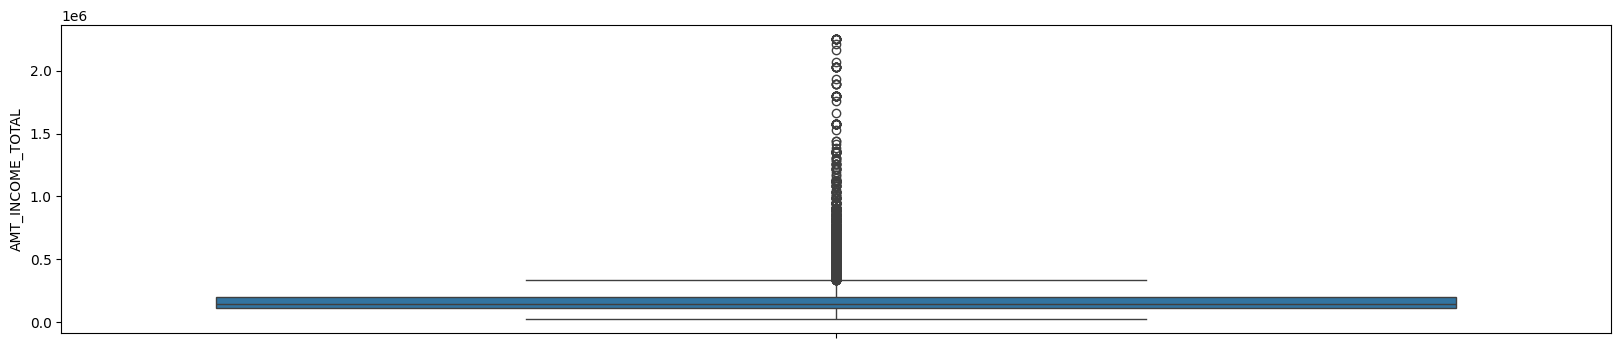

In [76]:
plt.figure(figsize=[20,4])
sns.boxplot(df_app['AMT_INCOME_TOTAL'])

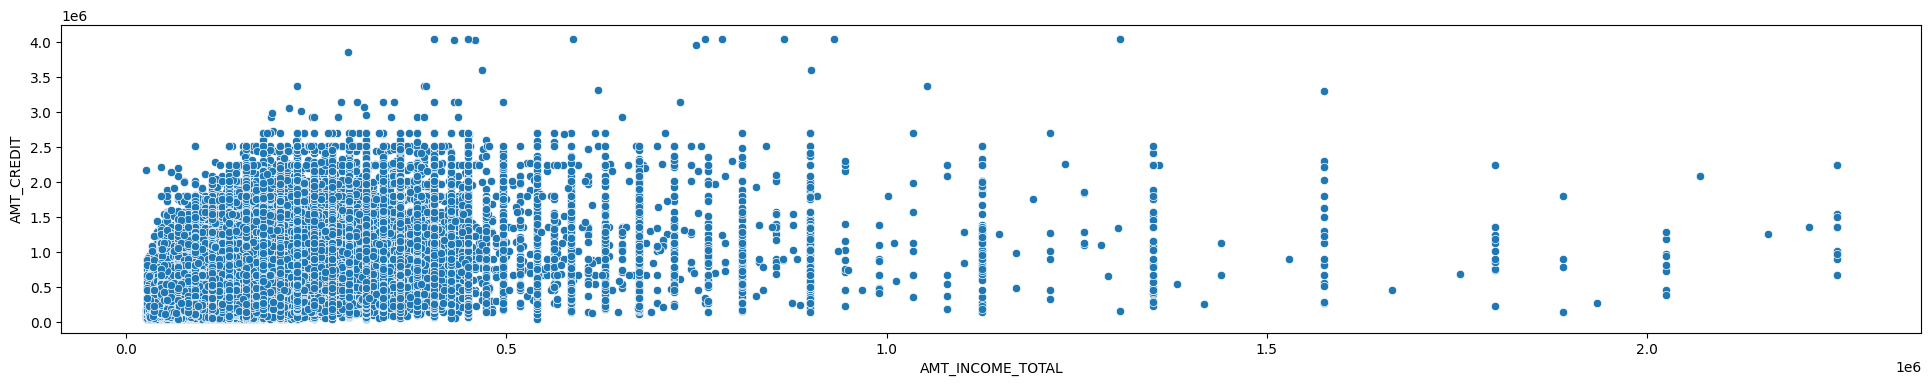

In [77]:
plt.figure(figsize=(24, 4))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=df_app)
plt.show()

In [78]:
df_app['AMT_INCOME_BINS'] = pd.qcut(df_app['AMT_INCOME_TOTAL'], q=[0, 0.2, 0.4, 0.6, 0.8, 0.9, 1], labels=['VL', 'L', 'M', 'H', 'VH', 'VVH'])

# q cut means quantile based cut
# 0 to 20 percentile: Very low income (VL)
# .
# .
# 90 to 100 percentile: Very very high income (VVH)

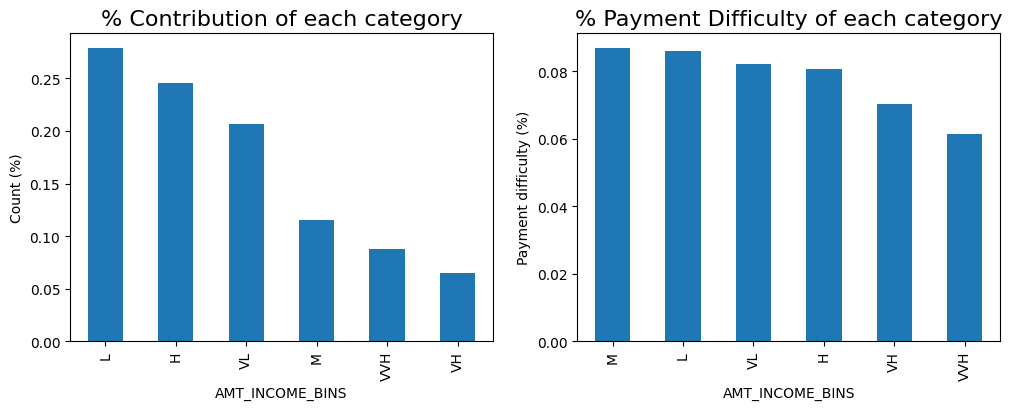

In [79]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['AMT_INCOME_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("AMT_INCOME_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='AMT_INCOME_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("AMT_INCOME_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [80]:
df_app['AMT_CREDIT'].describe()

count    3.074680e+05
mean     5.990025e+05
std      4.024680e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<Axes: ylabel='AMT_CREDIT'>

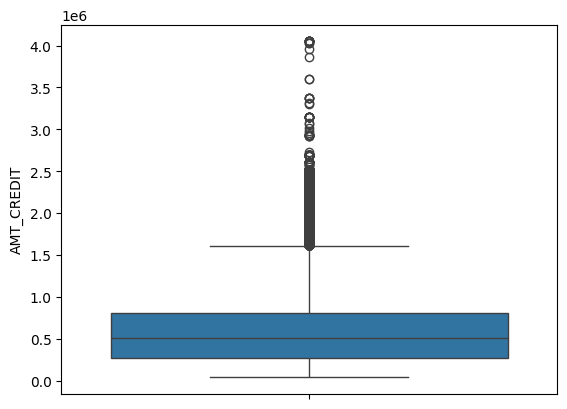

In [81]:
sns.boxplot(df_app['AMT_CREDIT'])

In [82]:
df_app['AMT_CREDIT_BINS'] = pd.qcut(df_app['AMT_CREDIT'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M', 'H', 'VH'])

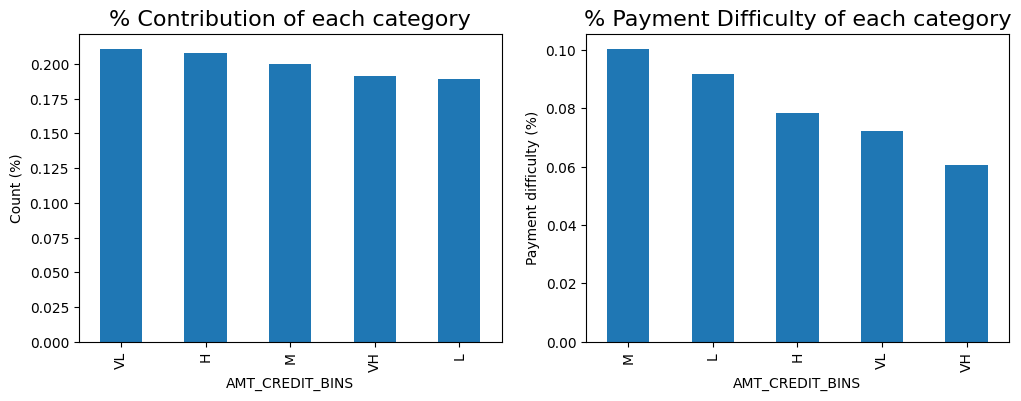

In [83]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['AMT_CREDIT_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("AMT_CREDIT_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='AMT_CREDIT_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("AMT_CREDIT_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [84]:
df_app['AMT_ANNUITY'].describe()

count    307468.000000
mean      27105.364950
std       14480.725918
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<Axes: ylabel='AMT_ANNUITY'>

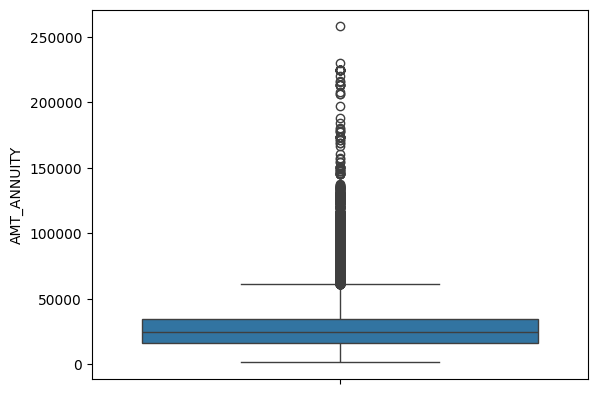

In [85]:
sns.boxplot(df_app['AMT_ANNUITY'])

In [86]:
df_app['AMT_ANNUITY_BINS'] = pd.qcut(df_app['AMT_ANNUITY'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M', 'H', 'VH'])

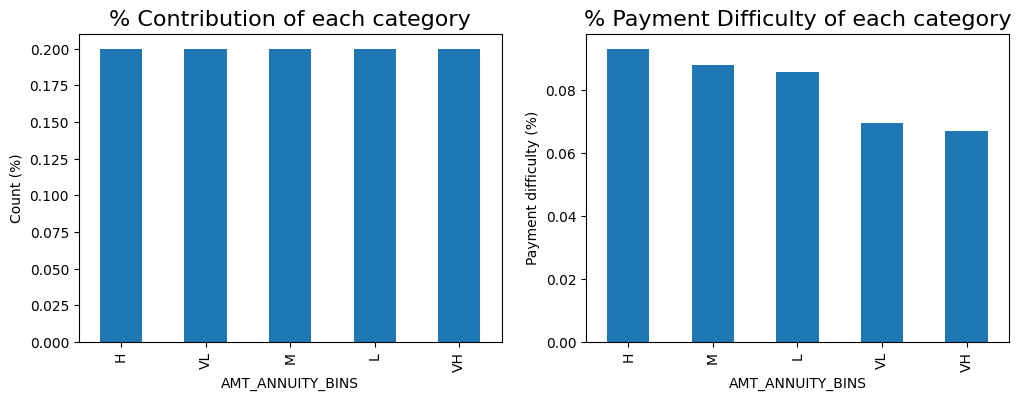

In [87]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['AMT_ANNUITY_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("AMT_ANNUITY_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='AMT_ANNUITY_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("AMT_ANNUITY_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [88]:
df_app['AMT_GOODS_PRICE'].describe()

count    3.074680e+05
mean     5.382921e+05
std      3.692589e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: ylabel='AMT_GOODS_PRICE'>

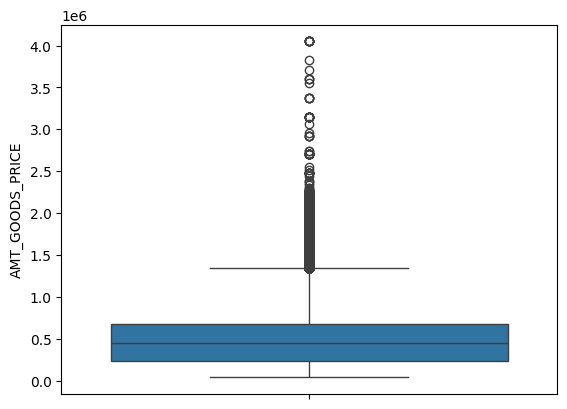

In [89]:
sns.boxplot(df_app['AMT_GOODS_PRICE'])

In [90]:
df_app['AMT_GOODS_PRICE_BINS'] = pd.qcut(df_app['AMT_GOODS_PRICE'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M', 'H', 'VH'])

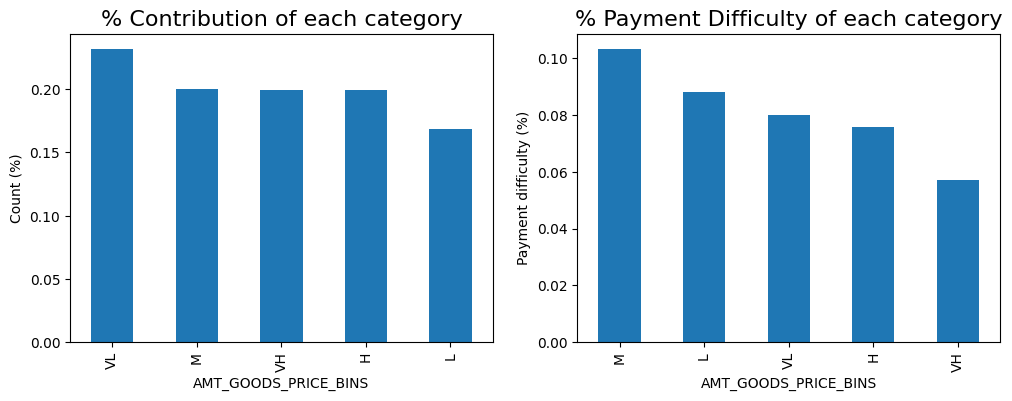

In [91]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['AMT_GOODS_PRICE_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("AMT_GOODS_PRICE_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='AMT_GOODS_PRICE_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("AMT_GOODS_PRICE_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [92]:
df_app['REGION_POPULATION_RELATIVE'].describe()

count    307468.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

<Axes: ylabel='REGION_POPULATION_RELATIVE'>

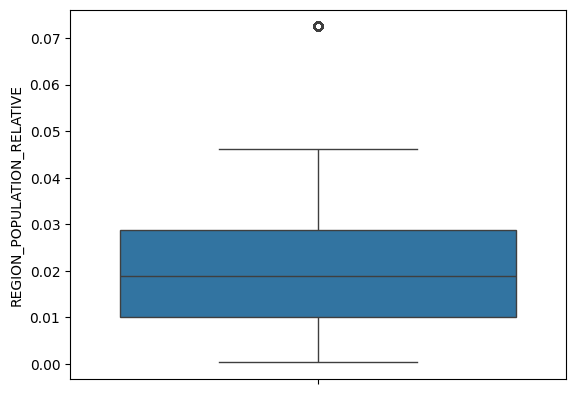

In [93]:
sns.boxplot(df_app['REGION_POPULATION_RELATIVE'])

In [94]:
df_app[df_app['REGION_POPULATION_RELATIVE'] > 0.07]['REGION_POPULATION_RELATIVE'].value_counts()

# 8412 data points have REGION_POPULATION_RELATIVE value = 0.072508 (but not an outlier)

REGION_POPULATION_RELATIVE
0.072508    8412
Name: count, dtype: int64

In [95]:
df_app['REGION_POPULATION_RELATIVE_BINS'] = pd.qcut(df_app['REGION_POPULATION_RELATIVE'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M', 'H', 'VH'])

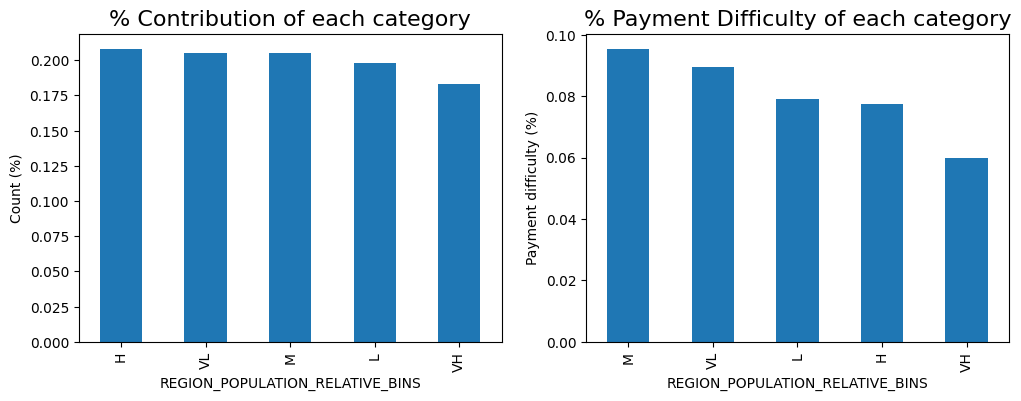

In [96]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['REGION_POPULATION_RELATIVE_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("REGION_POPULATION_RELATIVE_BINS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='REGION_POPULATION_RELATIVE_BINS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("REGION_POPULATION_RELATIVE_BINS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [97]:
df_app['DAYS_BIRTH'].describe()

# Age in days does not make that much of sense, so convert them to years first

count    307468.000000
mean      16037.218325
std        4364.124361
min        7489.000000
25%       12413.000000
50%       15751.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

<Axes: ylabel='DAYS_BIRTH'>

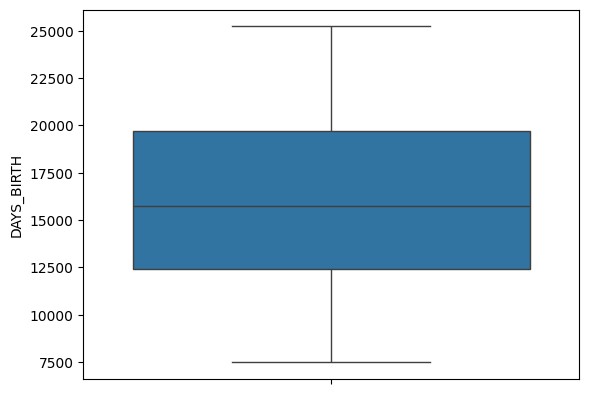

In [98]:
sns.boxplot(df_app['DAYS_BIRTH'])

In [99]:
df_app['YEARS_BIRTH'] = df_app['DAYS_BIRTH'].apply(lambda x: int(x/365))
df_app['YEARS_BIRTH'].describe()

count    307468.000000
mean         43.436579
std          11.954962
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64

In [100]:
df_app['YEARS_BIRTH_GROUPS'] = pd.cut(df_app['YEARS_BIRTH'], bins=[18,26,36,48,60,9999], labels=['below-26', '26-36', '36-48', '48-60', 'above-60' ])

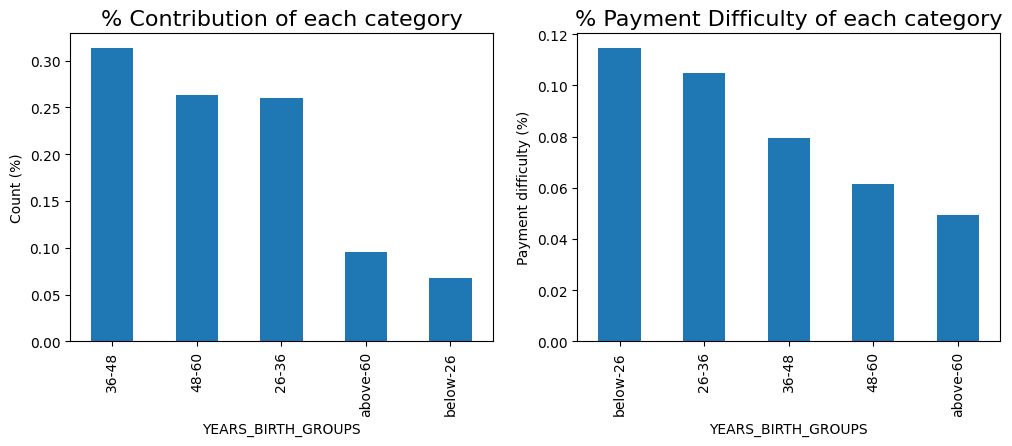

In [101]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_BIRTH_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_BIRTH_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_BIRTH_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_BIRTH_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: smaller the age, more will be the loan payment difficulty

In [102]:
df_app['DAYS_EMPLOYED'].describe()

count    307468.000000
mean      67732.725636
std      139450.364411
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: ylabel='DAYS_EMPLOYED'>

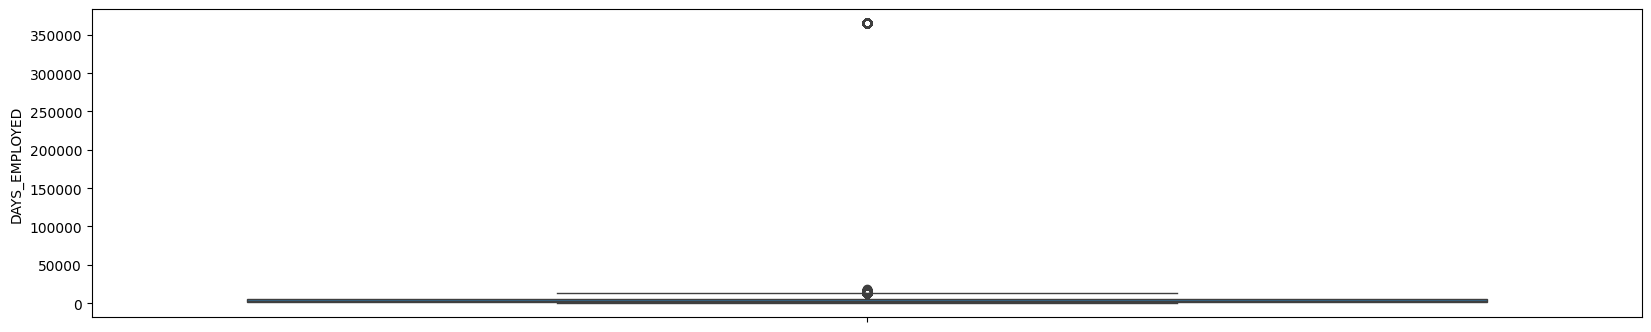

In [103]:
plt.figure(figsize=[20,4])
sns.boxplot(df_app['DAYS_EMPLOYED'])

In [104]:
df_app = df_app[df_app['DAYS_EMPLOYED'] < 350000]

In [105]:
365243/365

# 1000 years!

1000.6657534246575

In [106]:
df_app['YEARS_EMPLOYED'] = df_app['DAYS_EMPLOYED'].apply(lambda x: int(x/365))
df_app['YEARS_EMPLOYED'].describe()

count    252095.000000
mean          6.037089
std           6.416145
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          49.000000
Name: YEARS_EMPLOYED, dtype: float64

<Axes: ylabel='YEARS_EMPLOYED'>

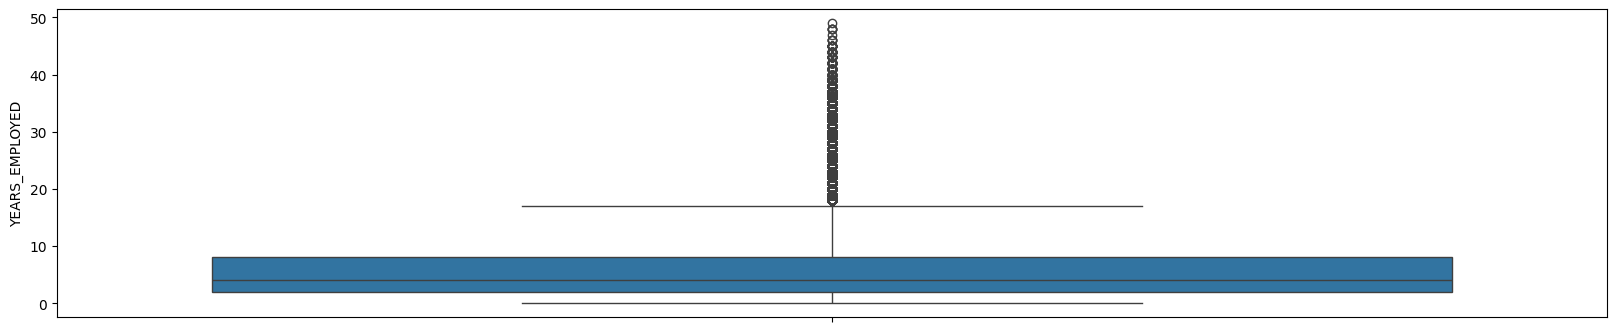

In [107]:
plt.figure(figsize=[20,4])
sns.boxplot(df_app['YEARS_EMPLOYED'])

In [108]:
print(np.percentile(df_app['YEARS_EMPLOYED'], 20))
print(np.percentile(df_app['YEARS_EMPLOYED'], 40))
print(np.percentile(df_app['YEARS_EMPLOYED'], 60))
print(np.percentile(df_app['YEARS_EMPLOYED'], 80))
print(np.percentile(df_app['YEARS_EMPLOYED'], 100))

1.0
3.0
5.0
10.0
49.0


In [109]:
df_app['YEARS_EMPLOYED_GROUPS'] = pd.cut(df_app['YEARS_EMPLOYED'], [0,2,5,10,20,30,40,9999], labels=['0-2','2-5', '5-10', '10-20', '20-30', '30-40', '40+'])

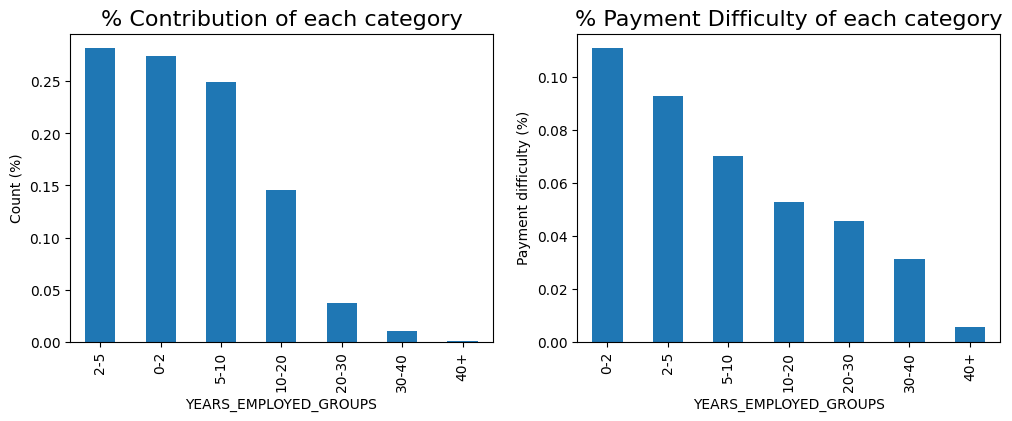

In [110]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_EMPLOYED_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_EMPLOYED_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_EMPLOYED_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_EMPLOYED_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: People with higher employment years havelesser loan payment difficulty

In [111]:
df_app['DAYS_REGISTRATION'].describe()

count    252095.000000
mean       4635.537016
std        3252.253629
min           0.000000
25%        1845.000000
50%        4265.000000
75%        6952.500000
max       22928.000000
Name: DAYS_REGISTRATION, dtype: float64

<Axes: ylabel='YEARS_REGISTRATION'>

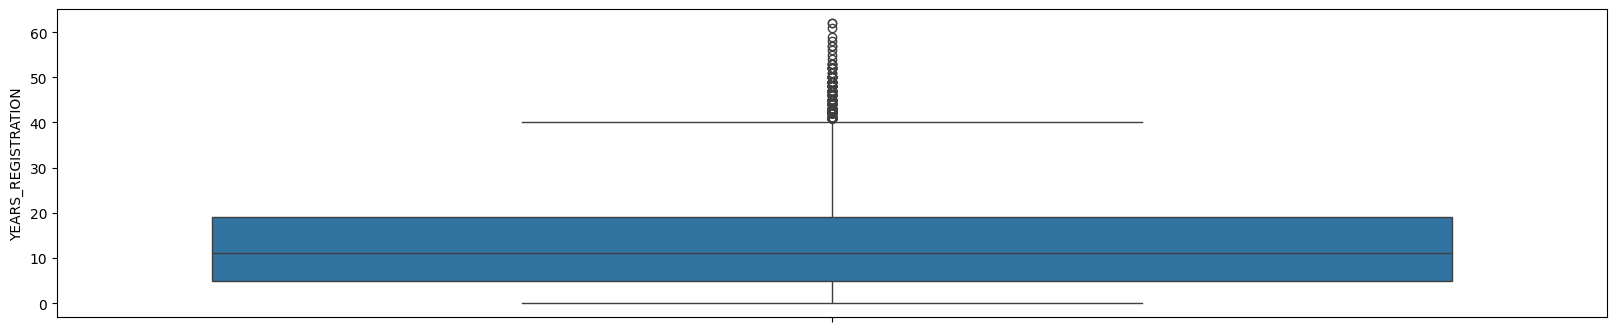

In [112]:
df_app['YEARS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].apply(lambda x: int(x/365))

plt.figure(figsize=[20,4])
sns.boxplot(df_app['YEARS_REGISTRATION'])

In [113]:
print(np.percentile(df_app['YEARS_REGISTRATION'], 20))
print(np.percentile(df_app['YEARS_REGISTRATION'], 40))
print(np.percentile(df_app['YEARS_REGISTRATION'], 60))
print(np.percentile(df_app['YEARS_REGISTRATION'], 80))
print(np.percentile(df_app['YEARS_REGISTRATION'], 100))

3.0
9.0
13.0
20.0
62.0


In [114]:
df_app['YEARS_REGISTRATION_GROUPS'] = pd.cut(df_app['YEARS_REGISTRATION'], [0,2,5,10,20,30,40,9999], labels=['0-2','2-5', '5-10', '10-20', '20-30', '30-40', '40+'])

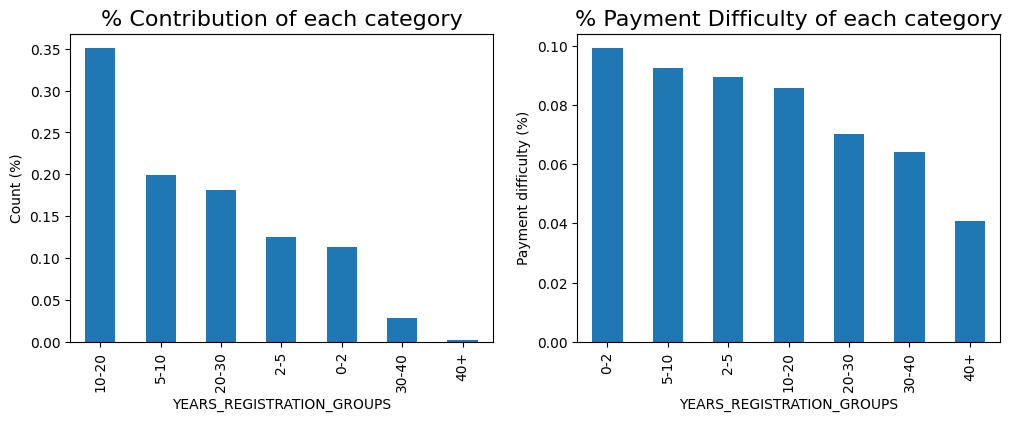

In [115]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_REGISTRATION_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_REGISTRATION_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_REGISTRATION_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_REGISTRATION_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [116]:
df_app['DAYS_ID_PUBLISH'].describe()

count    252095.000000
mean       2800.626359
std        1515.363323
min           0.000000
25%        1487.000000
50%        2886.000000
75%        4177.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

<Axes: ylabel='YEARS_ID_PUBLISH'>

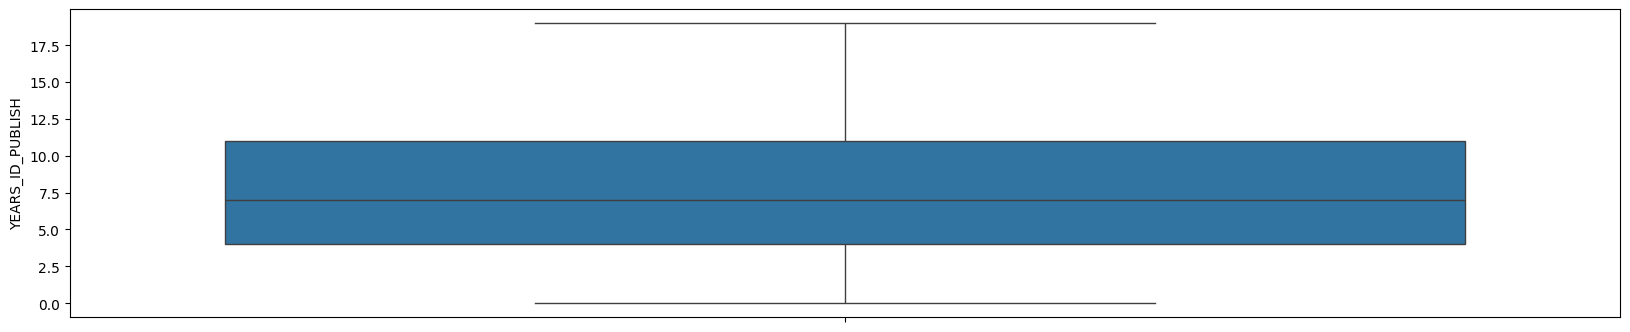

In [117]:
df_app['YEARS_ID_PUBLISH'] = df_app['DAYS_ID_PUBLISH'].apply(lambda x: int(x/365))

plt.figure(figsize=[20,4])
sns.boxplot(df_app['YEARS_ID_PUBLISH'])

In [118]:
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 20))
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 40))
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 60))
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 80))
print(np.percentile(df_app['YEARS_ID_PUBLISH'], 100))

3.0
6.0
9.0
11.0
19.0


In [119]:
df_app['YEARS_ID_PUBLISH_GROUPS'] = pd.cut(df_app['YEARS_ID_PUBLISH'], [0,3,6,9,11,100], labels=['0-3', '3-6', '6-9', '9-11', '11+' ])

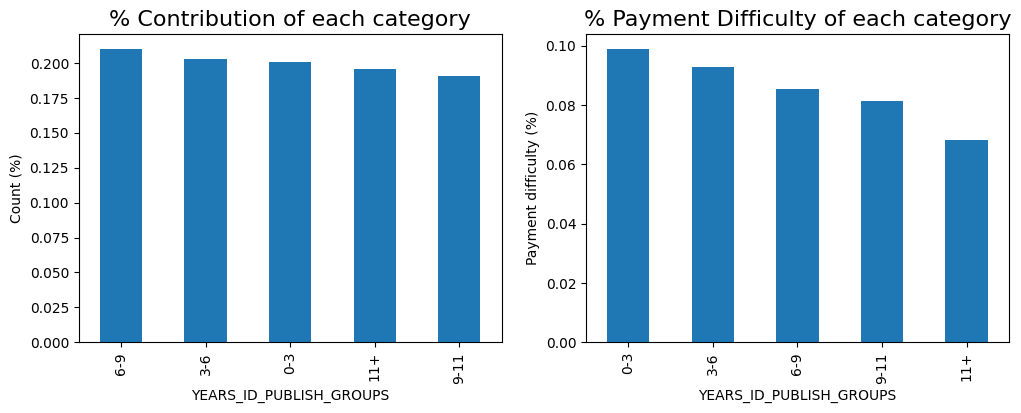

In [120]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_ID_PUBLISH_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_ID_PUBLISH_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_ID_PUBLISH_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_ID_PUBLISH_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

In [121]:
df_app['DAYS_LAST_PHONE_CHANGE'].describe()

count    252095.000000
mean        971.064496
std         827.306679
min           0.000000
25%         288.000000
50%         763.000000
75%        1578.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<Axes: ylabel='YEARS_LAST_PHONE_CHANGE'>

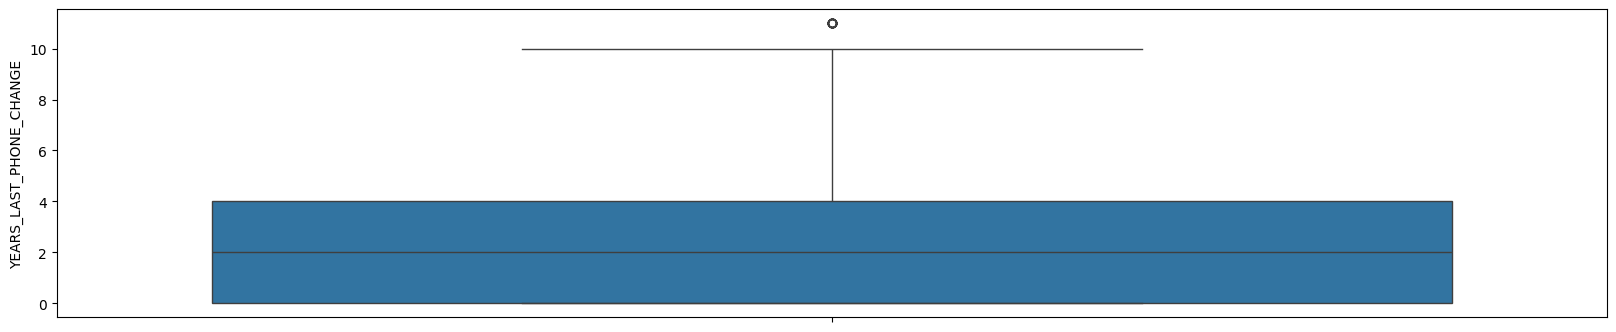

In [122]:
df_app['YEARS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: int(x/365))

plt.figure(figsize=[20,4])
sns.boxplot(df_app['YEARS_LAST_PHONE_CHANGE'])

In [123]:
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 20))
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 40))
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 60))
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 80))
print(np.percentile(df_app['YEARS_LAST_PHONE_CHANGE'], 100))

0.0
1.0
2.0
4.0
11.0


In [124]:
df_app['YEARS_LAST_PHONE_CHANGE_GROUPS'] = pd.cut(df_app['YEARS_LAST_PHONE_CHANGE'], [0,1,2,3,4,5,999], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5+' ])

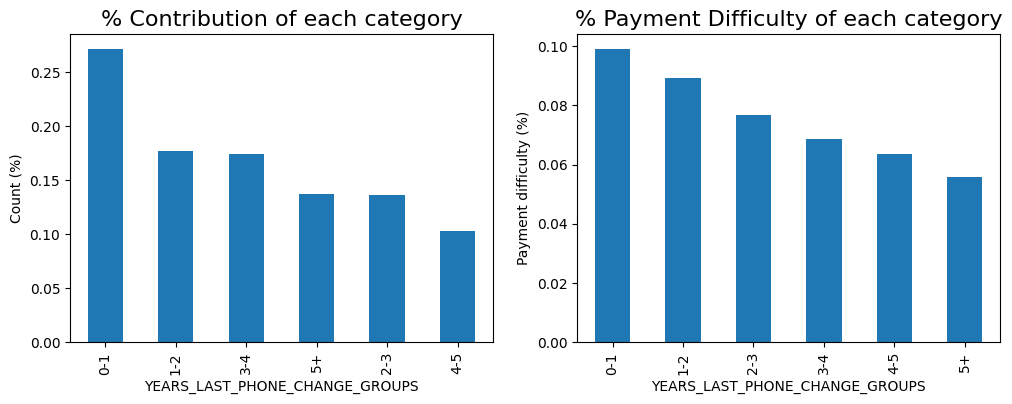

In [125]:
plt.figure(figsize=[12,4]) # so that both plots can come in the same figure

plt.subplot(1,2,1)
df_app['YEARS_LAST_PHONE_CHANGE_GROUPS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% Contribution of each category', fontsize=16)
plt.xlabel("YEARS_LAST_PHONE_CHANGE_GROUPS")
plt.ylabel("Count (%)")

plt.subplot(1,2,2)
df_app.groupby(by='YEARS_LAST_PHONE_CHANGE_GROUPS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('% Payment Difficulty of each category', fontsize=16)
plt.xlabel("YEARS_LAST_PHONE_CHANGE_GROUPS")
plt.ylabel("Payment difficulty (%)")

plt.show()

# Observation: Applicants who do not change their phone very often have less loan payment difficulty

<Axes: xlabel='TARGET'>

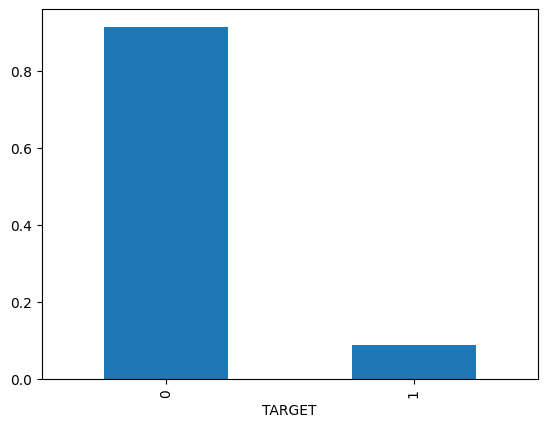

In [126]:
df_app['TARGET'].value_counts(normalize=True).plot.bar()

In [127]:
df_app['TARGET'].mean()*100

# Around 8.6 percent applicants have difficulty in loan payment

8.659433943553026

In [128]:
# since we have created year columns from day column, so drop previous columns
discard_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
df_app.drop(discard_list, axis=1, inplace=True)
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers              1.0   
1                    0.003541      Core staff              2.0   
2                    0.010032        Laborers              1.0   
3                    0.008019        Laborers              2.0   
4                    0.028663      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY  Business Entity Type 3   
1                     MONDAY                  School   
2                     MONDAY              Government   
3                  WEDNESDAY  Business Entity Type 3   
4                   THURSDAY                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0

## Bivariate analysis

In [129]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers              1.0   
1                    0.003541      Core staff              2.0   
2                    0.010032        Laborers              1.0   
3                    0.008019        Laborers              2.0   
4                    0.028663      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY  Business Entity Type 3   
1                     MONDAY                  School   
2                     MONDAY              Government   
3                  WEDNESDAY  Business Entity Type 3   
4                   THURSDAY                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0

In [130]:
df_app_numerical = df_app[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION','YEARS_ID_PUBLISH']]

### For all the applicants (TARGET = 0, 1)

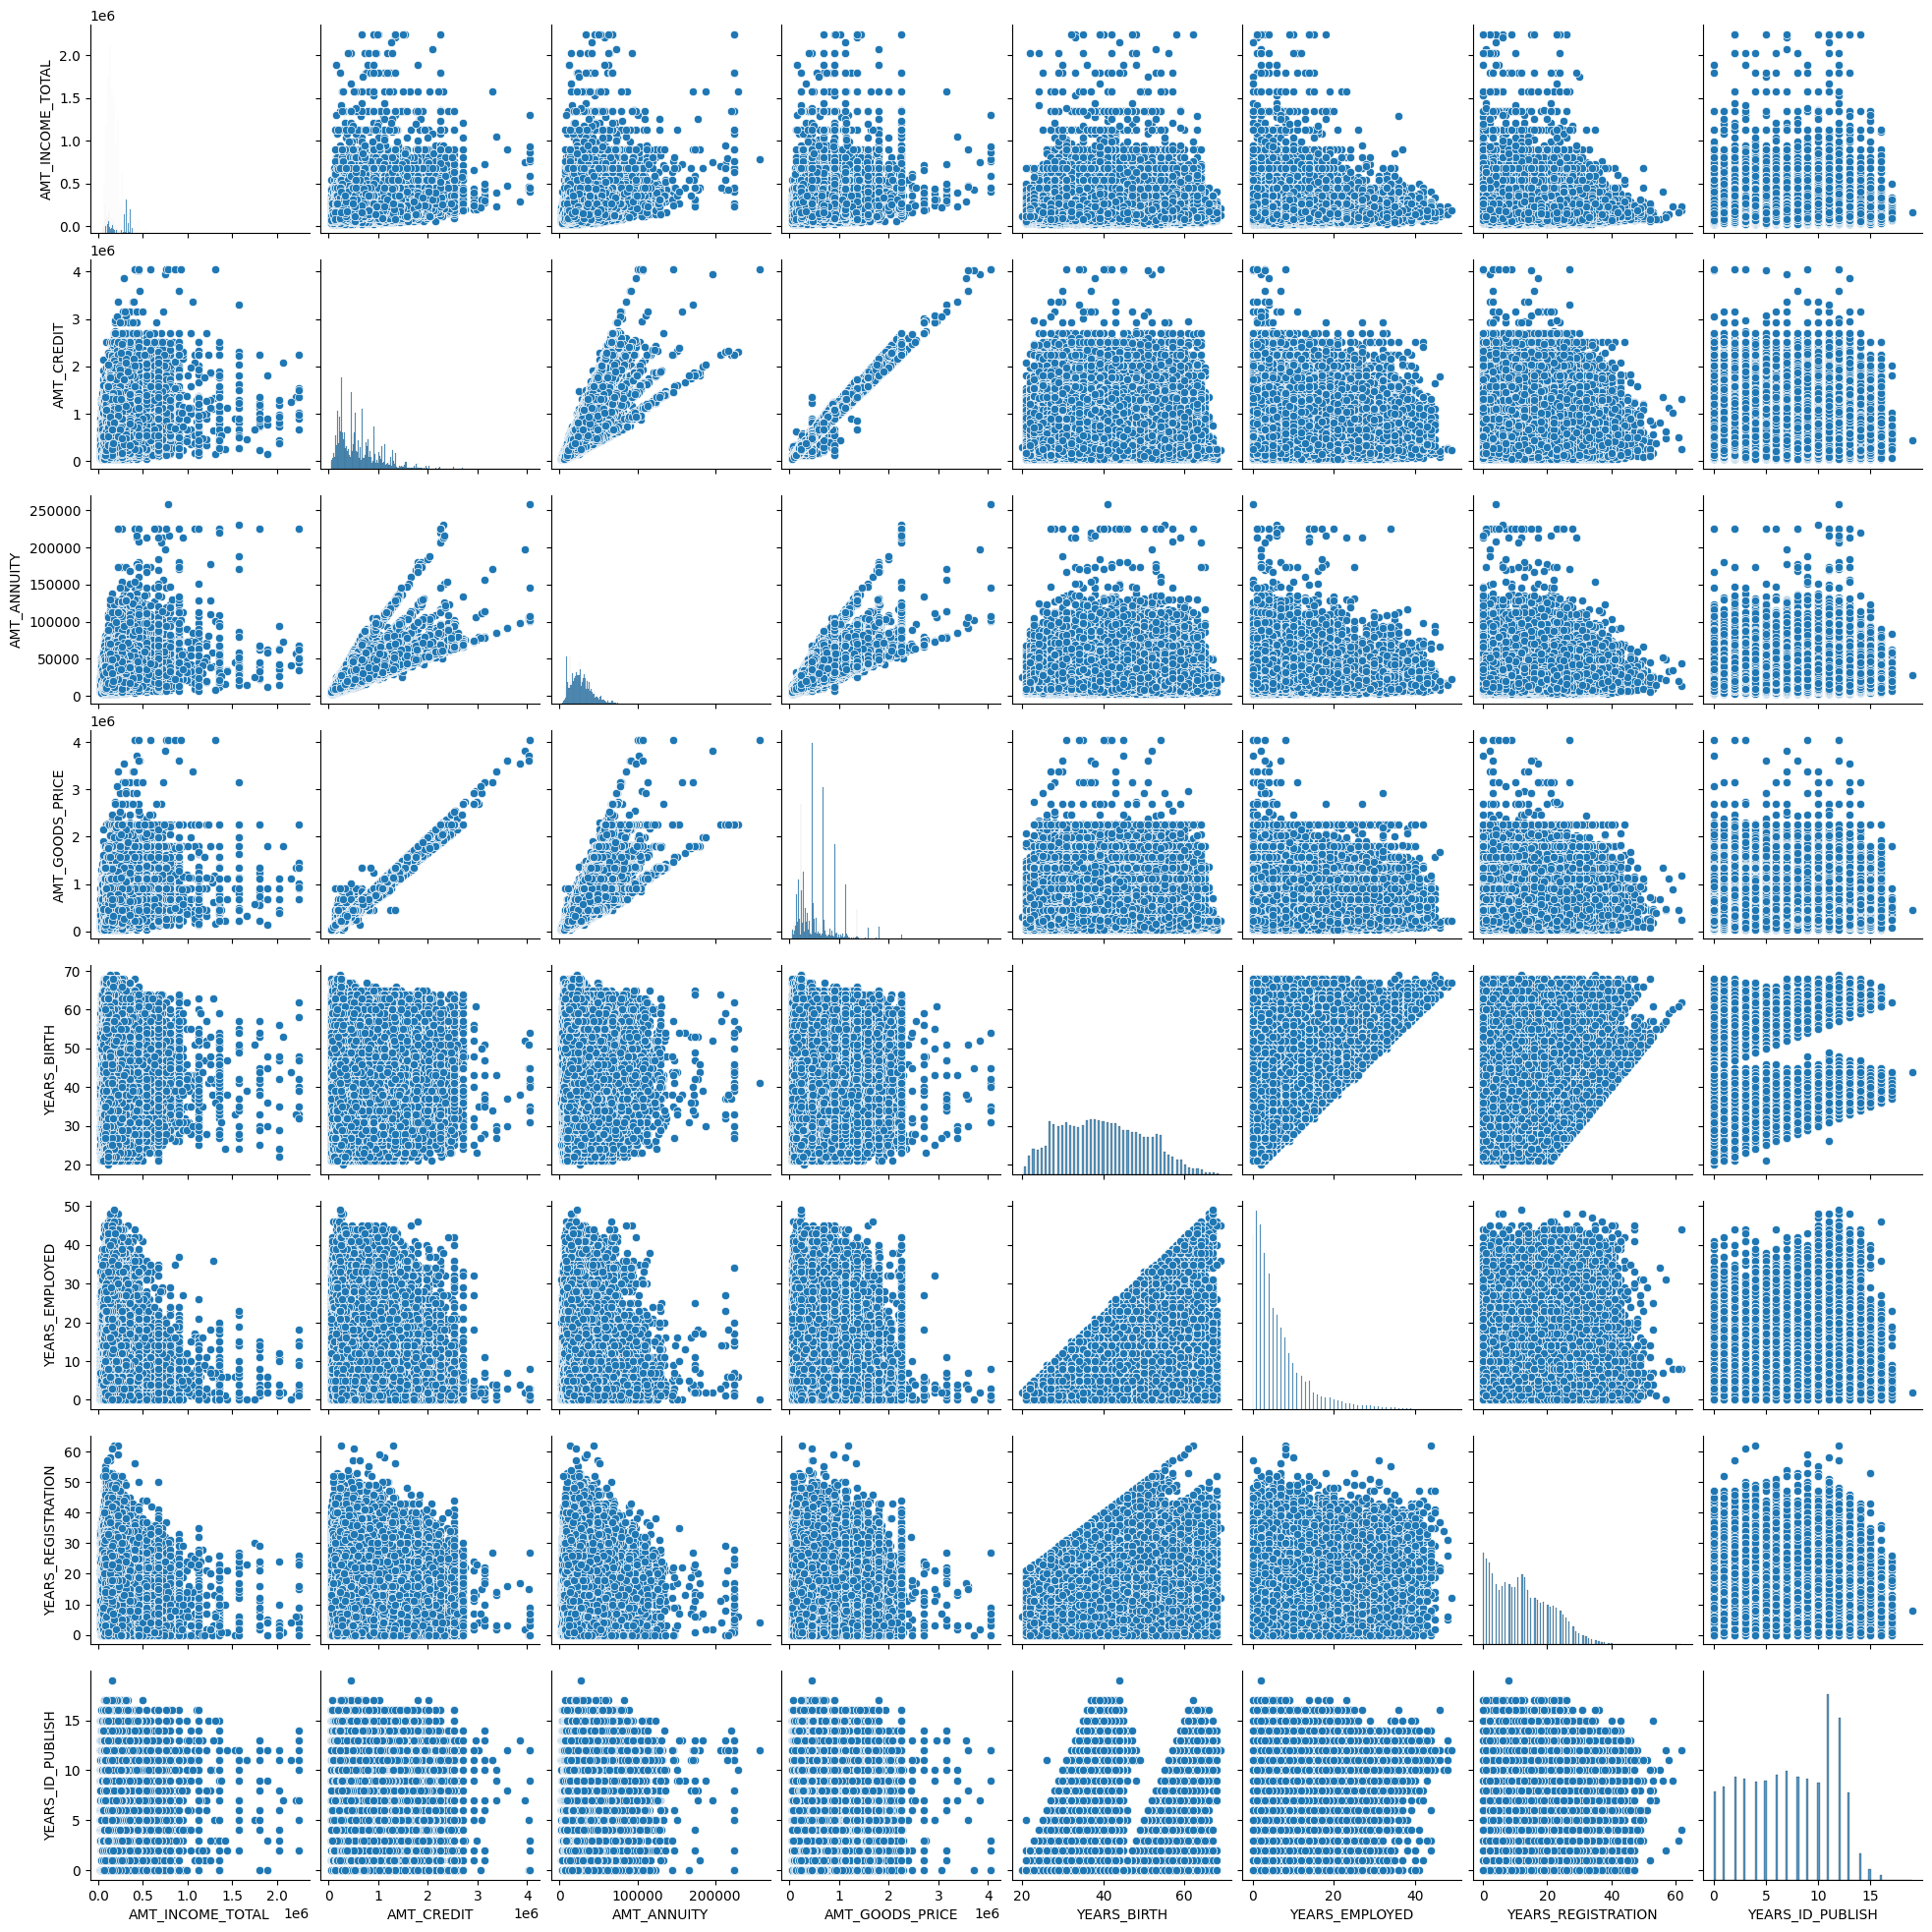

In [131]:
# pairplot for all numerical columns of all the rows

sns.pairplot(df_app_numerical.fillna(0))

# we can clearly see some variables have strong and medium correlation b etween them, we will see that in correlation heatmap in the nextr cell

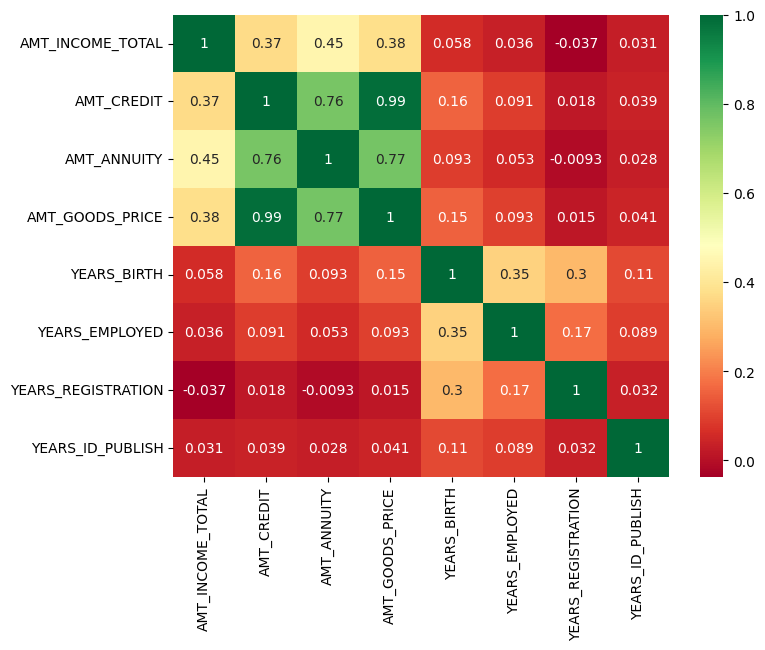

In [132]:
# heatmap for all numerical columns of all the rows
df_app_numerical_heatmap = df_app_numerical.corr()

plt.figure(figsize=[8,6])
sns.heatmap(df_app_numerical_heatmap, annot=True, cmap='RdYlGn')
plt.show()

### For applicants which are having loan payment difficulty (TARGET == 1)

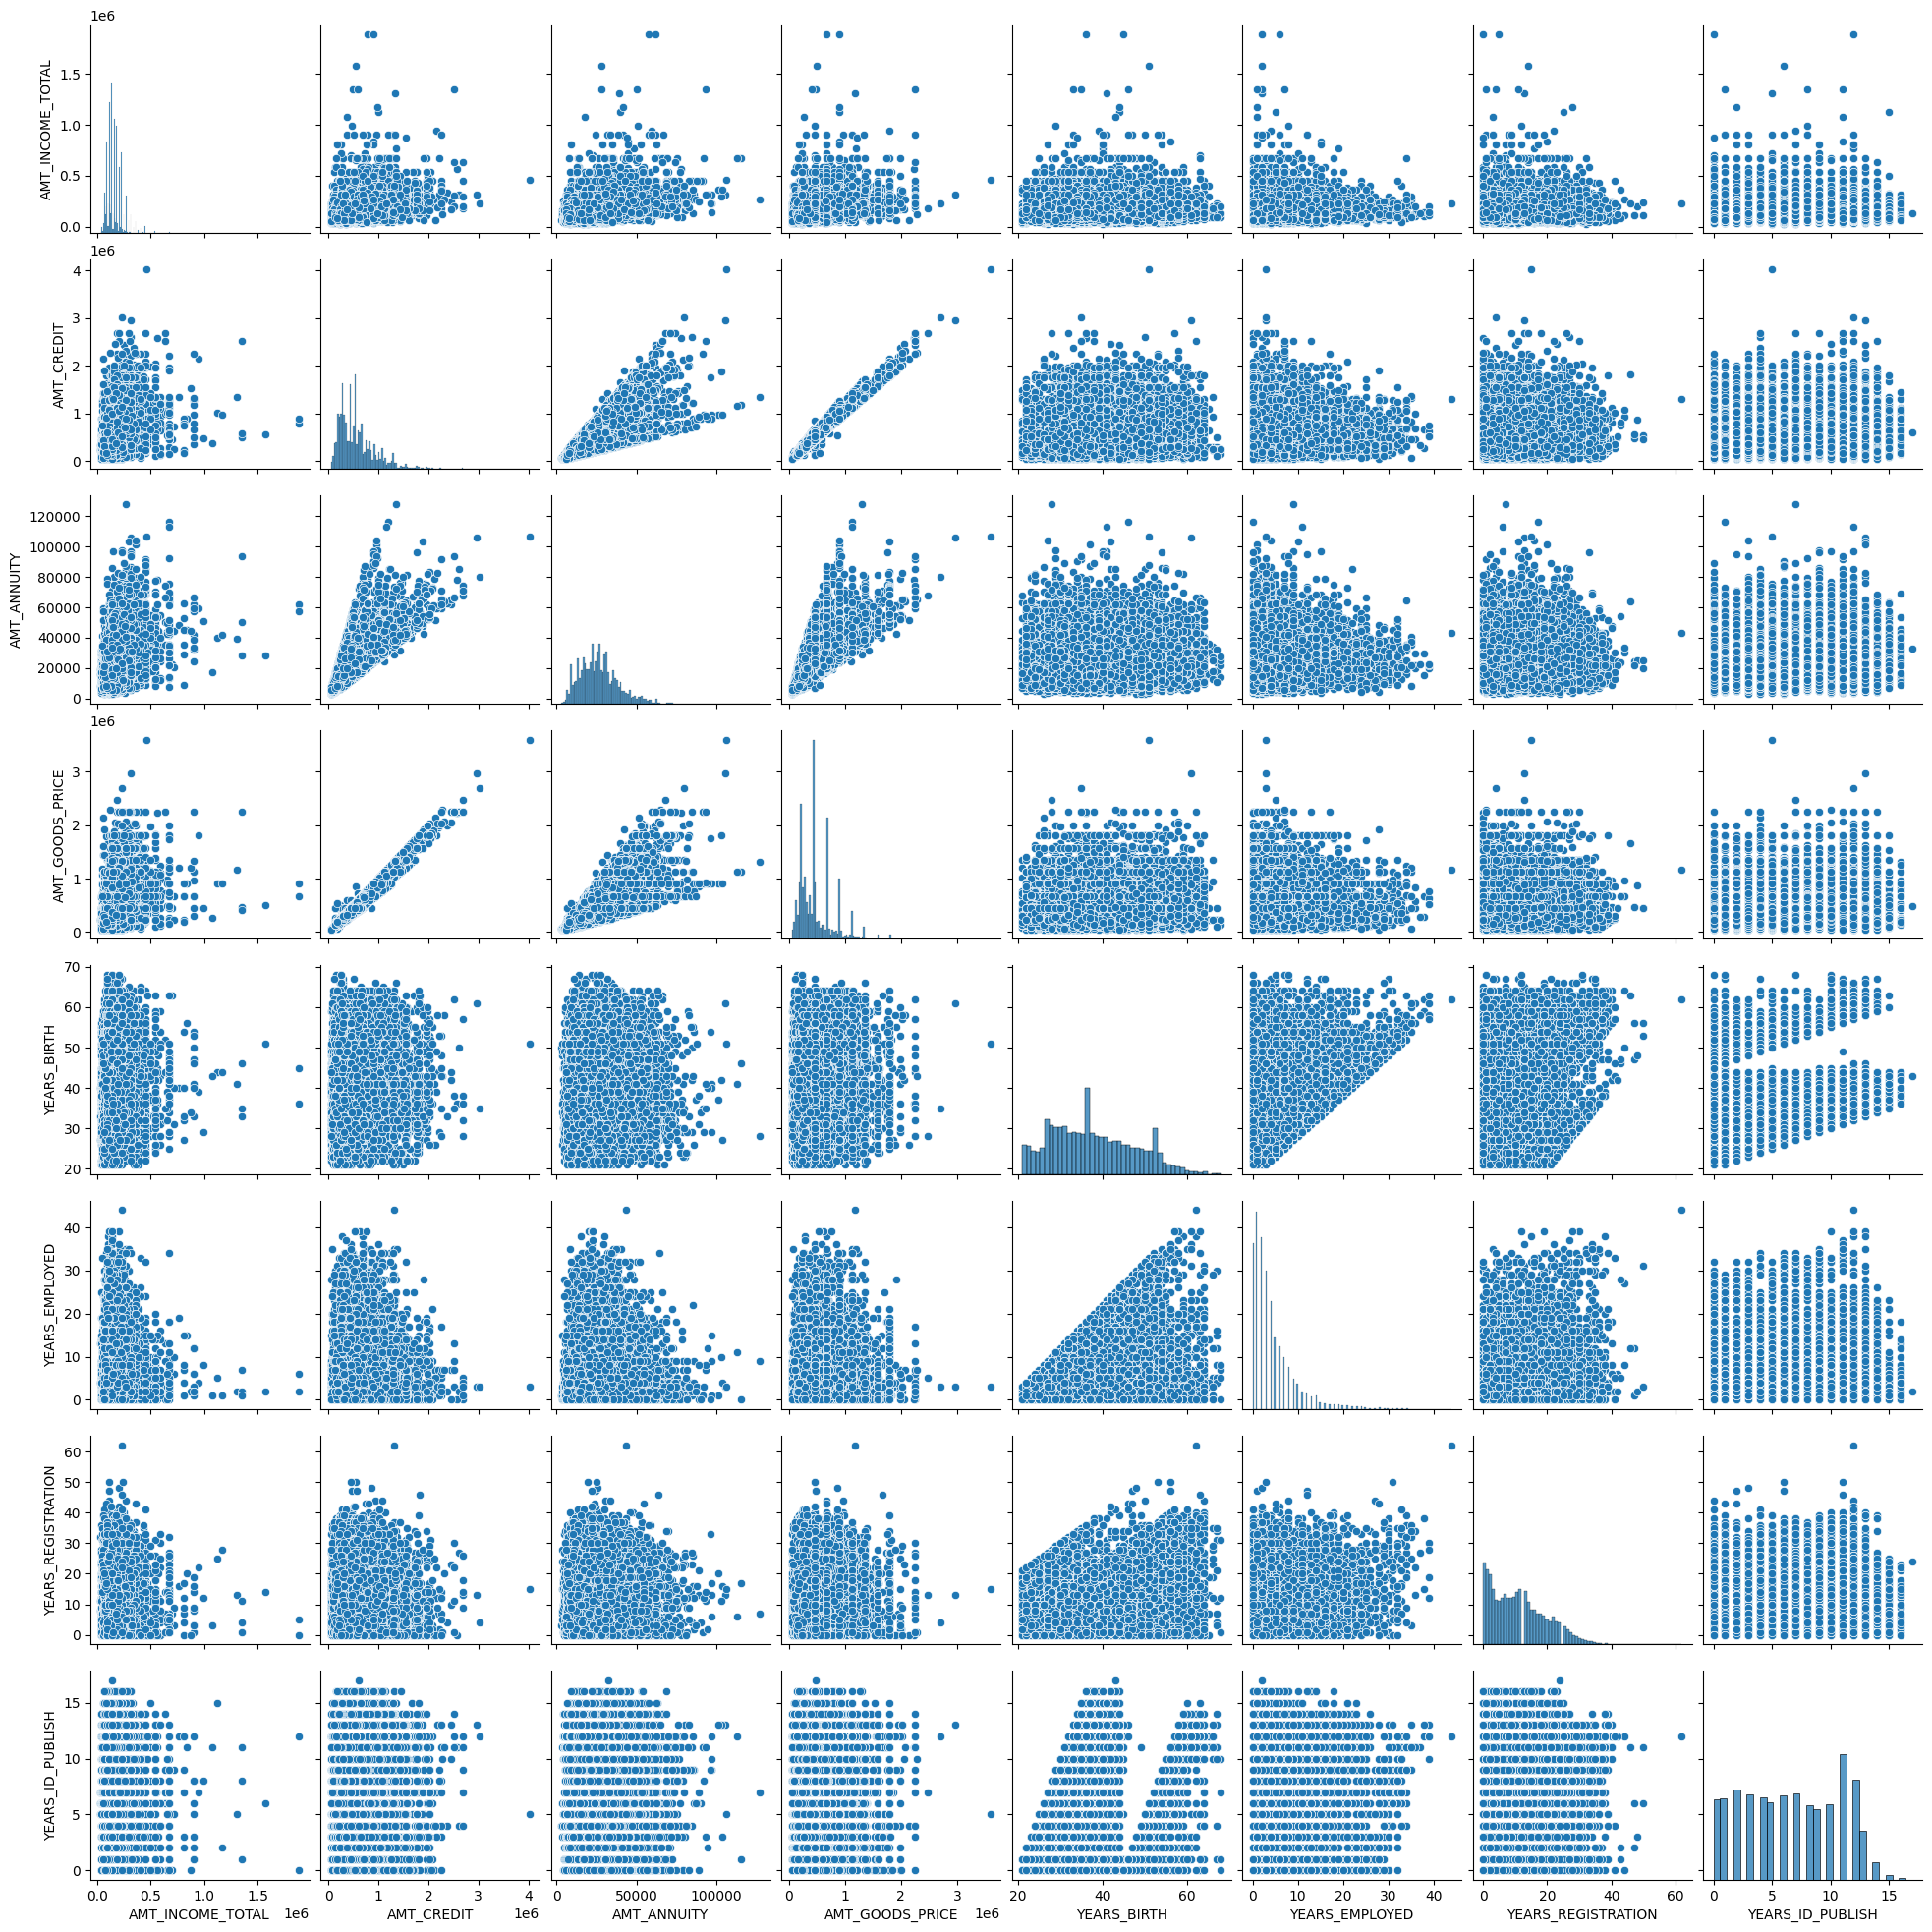

In [133]:
# pairplot for all numerical columns of the rows where there is loan payment difficulty

df_app_numerical_with_difficulty = df_app[df_app['TARGET'] == 1]
df_app_numerical_with_difficulty = df_app_numerical_with_difficulty[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION','YEARS_ID_PUBLISH']]
sns.pairplot(df_app_numerical_with_difficulty.fillna(0))

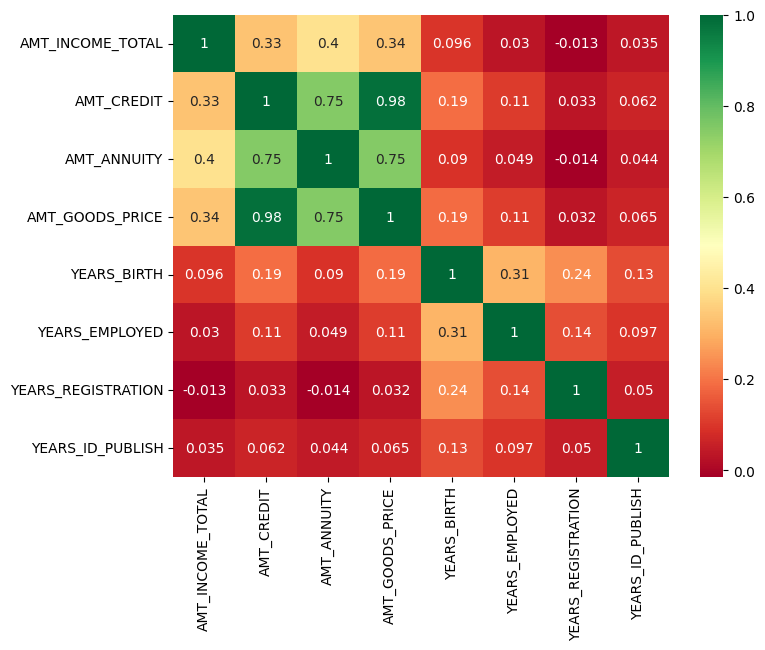

In [134]:
# heatmap for all numerical columns of the rows where there is loan payment difficulty

df_app_numerical_with_difficulty_heatmap = df_app_numerical_with_difficulty.corr()

plt.figure(figsize=[8,6])
sns.heatmap(df_app_numerical_with_difficulty_heatmap, annot=True, cmap='RdYlGn')
plt.show()

### For applicants which are not having loan payment difficulty, and rest of the cases (TARGET == 0)

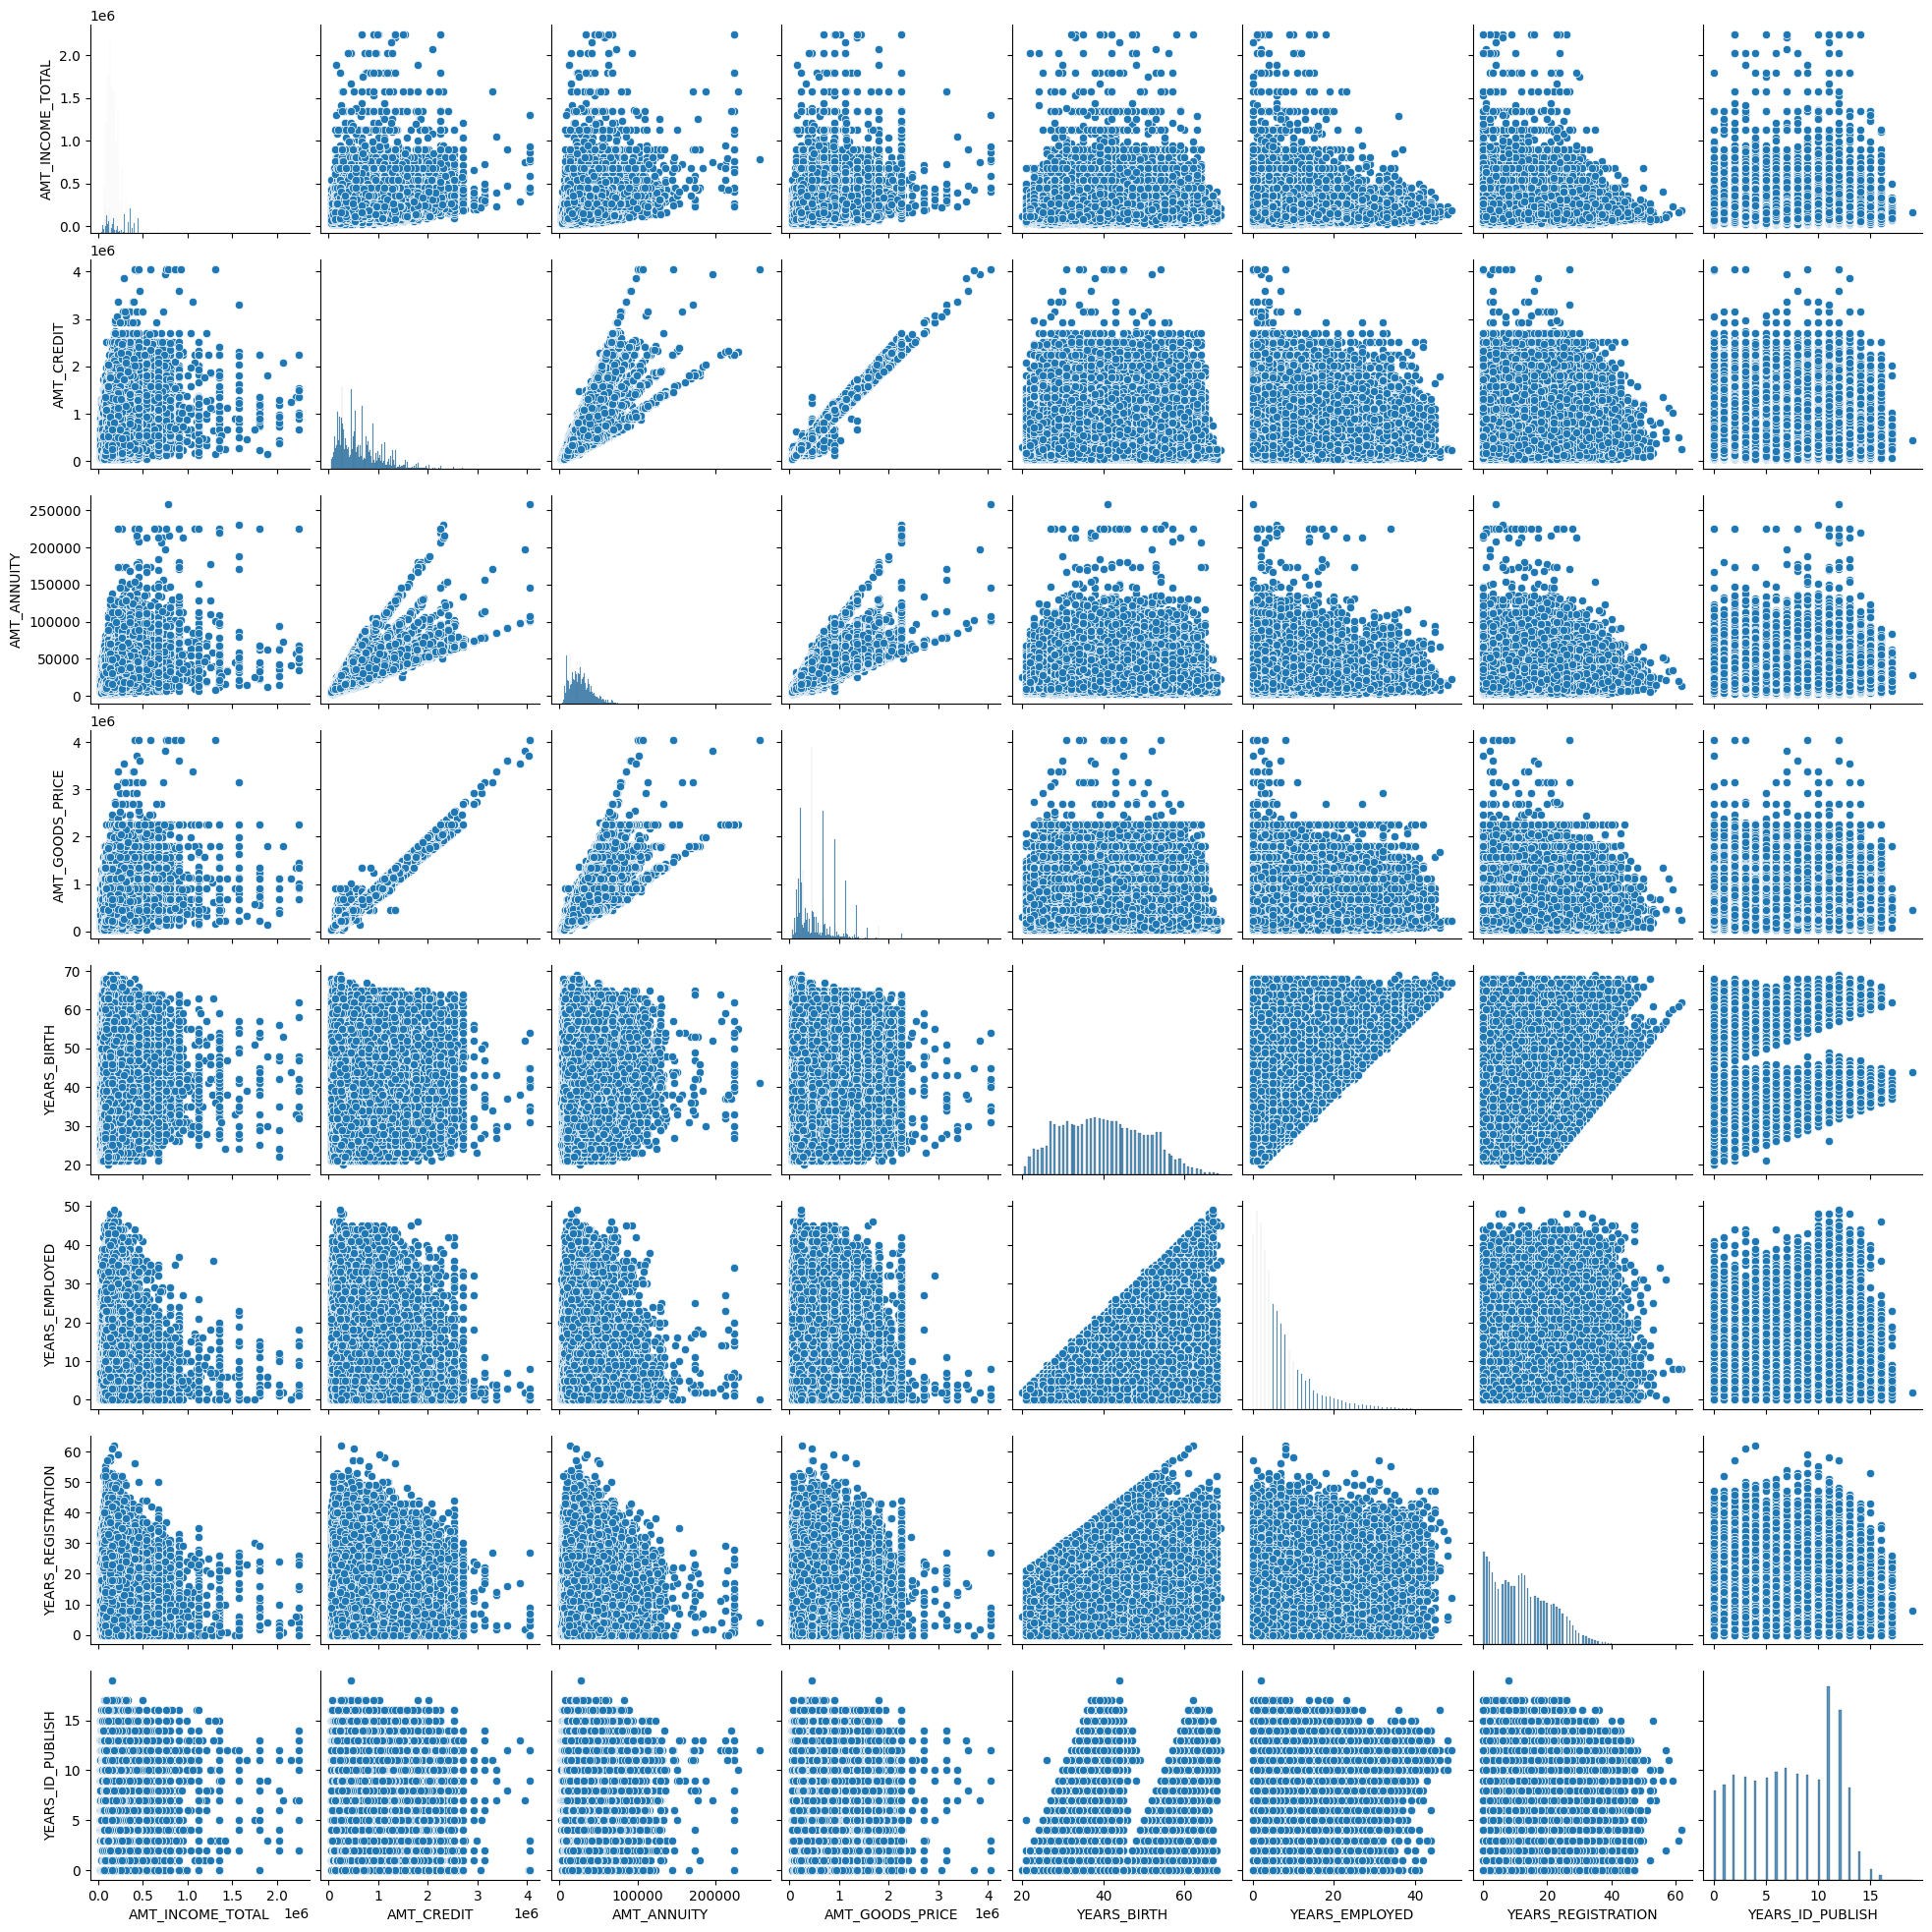

In [135]:
# pairplot for all numerical columns of the rows where there is no loan payment difficulty (all other cases)

df_app_numerical_rest_all_cases = df_app[df_app['TARGET'] == 0]
df_app_numerical_rest_all_cases = df_app_numerical_rest_all_cases[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION','YEARS_ID_PUBLISH']]
sns.pairplot(df_app_numerical_rest_all_cases.fillna(0))

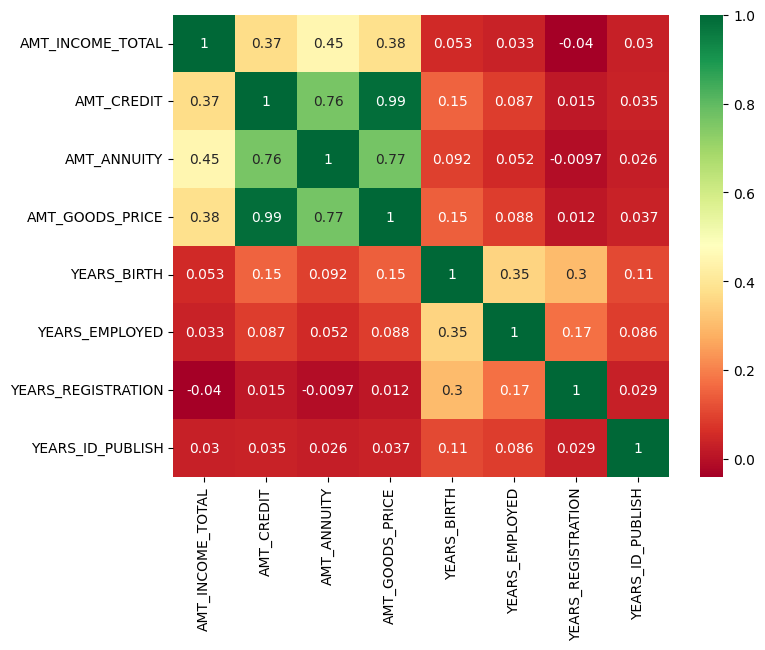

In [136]:
# heatmap for all numerical columns of the rows where there is no loan payment difficulty (all other cases)

df_app_numerical_rest_all_cases_heatmap = df_app_numerical_rest_all_cases.corr()

plt.figure(figsize=[8,6])
sns.heatmap(df_app_numerical_rest_all_cases_heatmap, annot=True, cmap='RdYlGn')
plt.show()

In [137]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers              1.0   
1                    0.003541      Core staff              2.0   
2                    0.010032        Laborers              1.0   
3                    0.008019        Laborers              2.0   
4                    0.028663      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY  Business Entity Type 3   
1                     MONDAY                  School   
2                     MONDAY              Government   
3                  WEDNESDAY  Business Entity Type 3   
4                   THURSDAY                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0

### Some multivariate analysis on loan applicant data

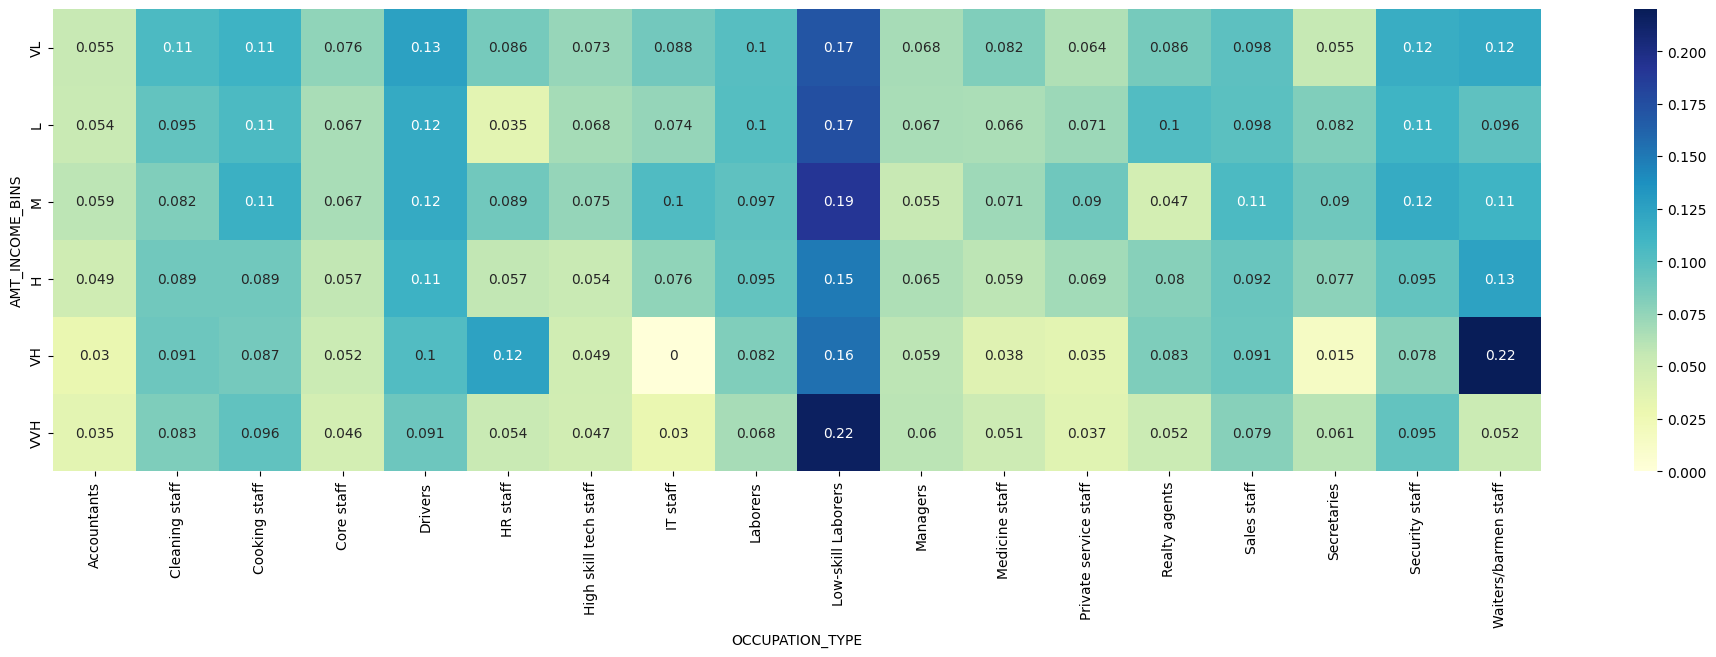

In [138]:
pv1_ = pd.pivot_table(df_app, index=['AMT_INCOME_BINS'], columns=['OCCUPATION_TYPE'], values='TARGET')

plt.figure(figsize=[24,6])
sns.heatmap(pv1_, annot=True, cmap="YlGnBu")
plt.show()

# Observation: Lower skilled laborers have maximum loan payment difficulty, even true when they are having higher income.
# Observation: Accountants have least difficulty in loan payments

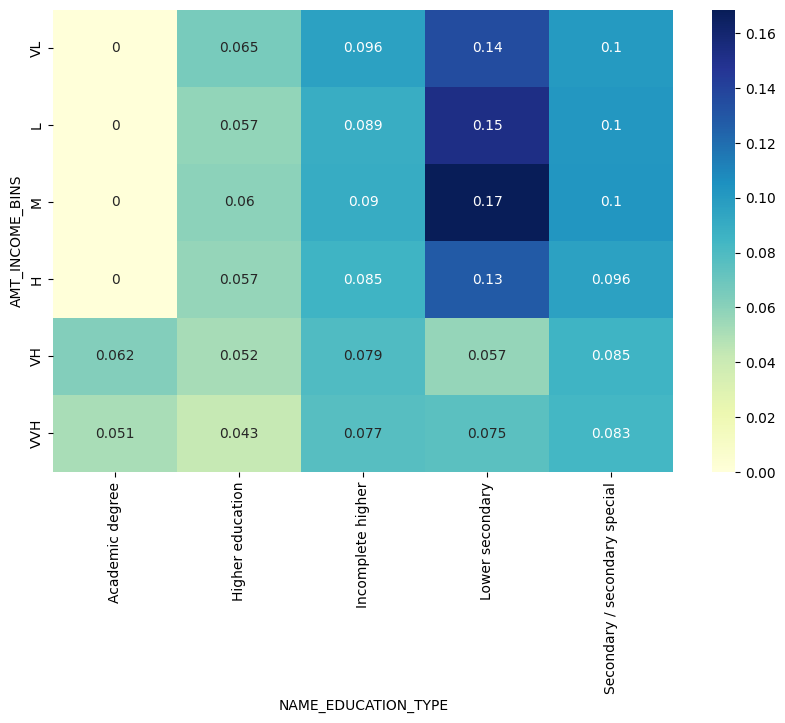

In [139]:
pv2_ = pd.pivot_table(df_app, index=['AMT_INCOME_BINS'], columns=['NAME_EDUCATION_TYPE'], values='TARGET')

plt.figure(figsize=[10,6])
sns.heatmap(pv2_, annot=True, cmap="YlGnBu")
plt.show()

# Observation: people with lower secondary type of education have maximum loan payment difficulty

## Finding 10 Highest correlations between two variables:
#### we will only consider data where TARGET == 1

In [140]:
df_app_numerical_with_difficulty.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0           202500.0    406597.5      24700.5         351000.0           25   
26          112500.0    979992.0      27076.5         702000.0           51   
40          202500.0   1193580.0      35028.0         855000.0           47   
42          135000.0    288873.0      16258.5         238500.0           36   
94          315000.0    953460.0      64107.0         900000.0           27   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0                1                   9                 5  
26               7                  18                 5  
40               3                   3                 2  
42               9                   0                12  
94               5                  13                 2

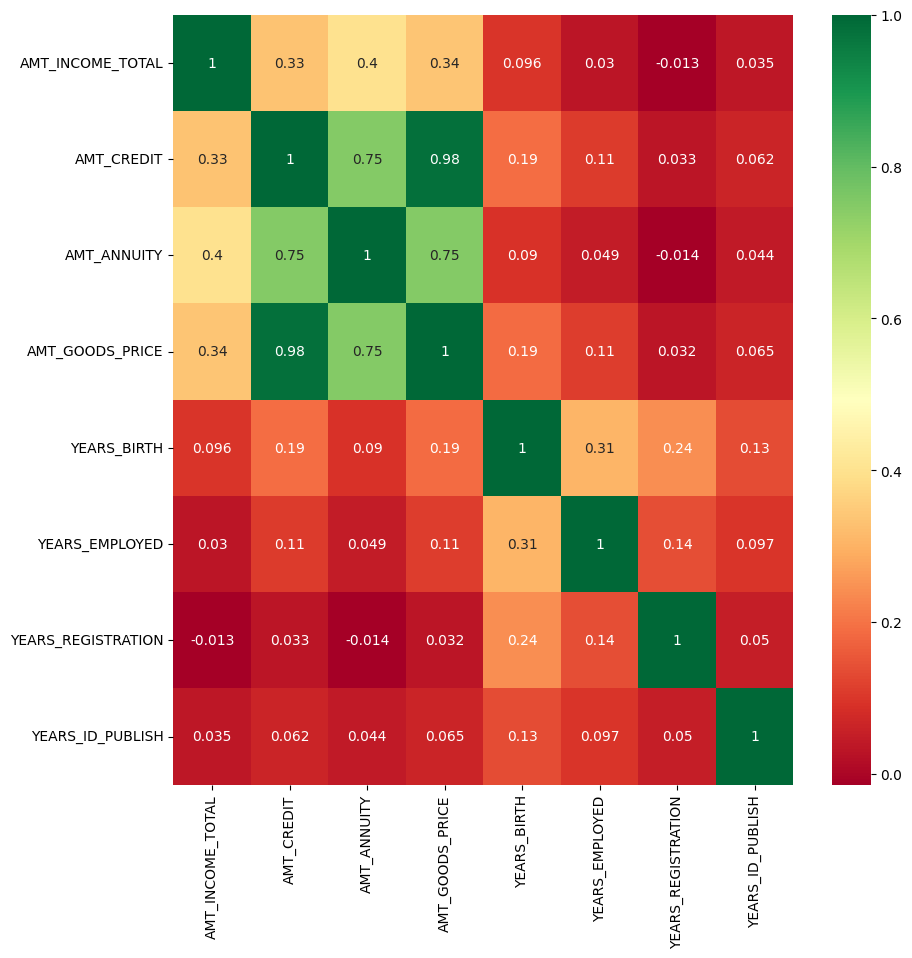

In [141]:
# here we are taking data rows where TARGET=1 (Client with payment difficulty)

plt.figure(figsize=[10,10])
sns.heatmap(df_app_numerical_with_difficulty.corr(), annot=True, cmap='RdYlGn')
plt.show()

#### From the above heatmap, it can be concluded that top 10 correlation variable pair are: (Variable1, Variable2, Correlation)
#### 1) AMT_CREDIT & AMT_GOODS_PRICE : 0.98
#### 2) AMT_ANNUITY & AMT_GOODS_PRICE : 0.75
#### 3) AMT_CREDIT & AMT_ANNUITY : 0.75
#### 4) AMT_INCOME_TOTAL & AMT_ANNUITY : 0.40
#### 5) AMT_INCOME_TOTAL & AMT_GOODS_PRICE : 0.34
#### 6) AMT_INCOME_TOTAL & AMT_CREDIT : 0.33
#### 7) YEARS_BIRTH & YEARS_EMPLOYED : 0.31
#### 8) YEARS_BIRTH & YEARS_REGISTRATION : 0.24
#### 9) AMT_CREDIT & YEARS_BIRTH : 0.19
#### 10) AMT_GOODS_PRICE & YEARS_EMPLOYED : 0.11
